# Kickstarter Project Analysis 

Import the packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Merge all the datasets

In [ ]:
kick1 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter001.csv')
kick2 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter002.csv')
kick3 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter003.csv')
kick4 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter004.csv')
kick5 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter005.csv')
kick6 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter006.csv')
kick7 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter007.csv')

FileNotFoundError: ignored

In [ ]:
df = pd.concat([kick1,kick2,kick3,kick4,kick5,kick6,kick7]).reset_index()
df

NameError: ignored

Find the duplicate data

In [ ]:
df1 = df['id'].value_counts().reset_index()
df1

index  id
0       927882654   2
1      1973609977   2
2       168885321   2
3       618265474   2
4        11391525   2
...           ...  ..
23355  1080879519   1
23356   542654186   1
23357  1505827979   1
23358   898841003   1
23359    77941940   1

[23360 rows x 2 columns]

Drop the duplicated project id that have count more than 1

In [ ]:
df1 = df1[df1['id']==1]

In [ ]:
df1 = df1.rename(columns = {'index':'id', 'id':'freq'})

Use inner join to merge with the original dataset by keeping only the unique values

In [ ]:
df = pd.merge(df1,df, how = 'inner', left_on = 'id', right_on = 'id')

## Feature Engineering 

Convert Epoch Time for all the date field to Normal Date

In [ ]:
df['created_at_date'] = pd.to_datetime(df['created_at'],unit='s')
df['launched_at_date'] = pd.to_datetime(df['launched_at'],unit='s')
df['deadline_date'] = pd.to_datetime(df['deadline'],unit='s')
df['state_changed_at_date'] = pd.to_datetime(df['state_changed_at'],unit='s')

Create new category field

In [ ]:
df['project_category'] = df['category'].apply(lambda x: x.split(",")[1][8:-1])

Create new duration field by week and day

In [ ]:
df['day_duration'] = (df['deadline_date'] - df['launched_at_date'])/np.timedelta64(1,'D')
df['week_duration'] = (df['deadline_date'] - df['launched_at_date'])/np.timedelta64(1,'W')

Create month and year field

In [ ]:
df['month'] = df['launched_at_date'].dt.month
df['year'] = df['launched_at_date'].dt.year

Final dataset after all feature engineering

Noted: We also remove several fields that is not meaningful in our analysis

In [ ]:
new_df = df[['backers_count','id','name','project_category','country','created_at_date','launched_at_date','deadline_date','day_duration','week_duration','state_changed_at_date','month','year','goal','is_starrable','pledged','spotlight','staff_pick','state']]

In [ ]:
new_df

backers_count          id  \
0                  1   231852603   
1                  0  1426701375   
2                 27   741576366   
3                179   282575662   
4                  3   574842660   
...              ...         ...   
22879              9  1080879519   
22880             26   542654186   
22881              3  1505827979   
22882             17   898841003   
22883            277    77941940   

                                                    name project_category  \
0                                      FtMore (Canceled)            Audio   
1      Border Collie Cafe........A Cookbook for Pet O...        Cookbooks   
2      Coldharr Chronicles: Rebirth - A novel by Xand...          Fiction   
3                 Changeling Space Program Print Edition          Fiction   
4                   The Song Writers Community Warehouse            Sound   
...                                                  ...              ...   
22879   Swiss Made Officine Tecniche - AQVAS DIVER WATCH   Product Design   
22880  ODEY® The Antibacterial bag that locks in swea...   Product Design   
22881                                   Kernel Commander   Product Design   
22882        Earth Warriors- Inclusive Runic Oracle Deck           Design   
22883                                    Büro Destruct 4   Graphic Design   

      country     created_at_date    launched_at_date       deadline_date  \
0          US 2020-07-27 14:20:01 2020-07-27 18:16:08 2020-09-25 18:16:08   
1          US 2014-07-08 14:24:16 2014-07-09 20:17:25 2014-08-08 20:17:25   
2          US 2021-05-21 00:30:47 2021-07-02 00:59:25 2021-08-31 00:59:25   
3          US 2021-06-29 22:23:40 2021-07-03 03:28:32 2021-08-02 03:28:32   
4          US 2015-01-23 14:44:01 2015-02-02 18:28:05 2015-03-04 18:28:05   
...       ...                 ...                 ...                 ...   
22879      IT 2021-07-13 11:03:11 2021-12-03 13:53:12 2021-12-19 21:00:00   
22880      GB 2021-12-02 14:39:48 2021-12-04 10:54:25 2022-01-13 10:54:25   
22881      US 2021-04-03 18:00:36 2021-12-04 17:33:07 2022-02-02 17:33:07   
22882      CA 2021-11-26 13:06:53 2021-12-05 03:46:20 2022-01-04 03:46:20   
22883      DE 2021-01-26 14:34:06 2021-02-18 15:54:56 2021-04-10 21:59:00   

       day_duration  week_duration state_changed_at_date  month  year  \
0         60.000000       8.571429   2020-07-28 18:32:23      7  2020   
1         30.000000       4.285714   2014-07-11 13:18:27      7  2014   
2         60.000000       8.571429   2021-08-31 00:59:25      7  2021   
3         30.000000       4.285714   2021-08-02 03:28:32      7  2021   
4         30.000000       4.285714   2015-03-04 18:28:07      2  2015   
...             ...            ...                   ...    ...   ...   
22879     16.296389       2.328056   2021-12-03 13:53:15     12  2021   
22880     40.000000       5.714286   2021-12-04 10:54:27     12  2021   
22881     60.000000       8.571429   2021-12-04 17:33:09     12  2021   
22882     30.000000       4.285714   2021-12-05 03:46:21     12  2021   
22883     51.252824       7.321832   2021-04-10 21:59:00      2  2021   

           goal  is_starrable   pledged  spotlight  staff_pick       state  
0         200.0         False      1.00      False       False    canceled  
1        5000.0         False      0.00      False       False    canceled  
2        1500.0         False   1697.00       True       False  successful  
3        1500.0         False  13675.00       True        True  successful  
4      125000.0         False      3.00      False       False      failed  
...         ...           ...       ...        ...         ...         ...  
22879   30000.0          True   4007.00      False       False        live  
22880   25000.0          True    756.00      False       False        live  
22881   30000.0          True     53.00      False       False        live  
22882    8900.0          True   1113.29      False       False        live  


Find the null values

In [ ]:
missing = new_df.isnull().sum()
missing

backers_count            0
id                       0
name                     0
project_category         0
country                  0
created_at_date          0
launched_at_date         0
deadline_date            0
day_duration             0
week_duration            0
state_changed_at_date    0
month                    0
year                     0
goal                     0
is_starrable             0
pledged                  0
spotlight                0
staff_pick               0
state                    0
dtype: int64

Include only successful and failed state since this is two values that we want to predict

In [ ]:
new_df = new_df[(new_df['state']=='successful')|(new_df['state']=='failed')|(new_df['state']=='canceled')]

<AxesSubplot:xlabel='backers_count', ylabel='Count'>

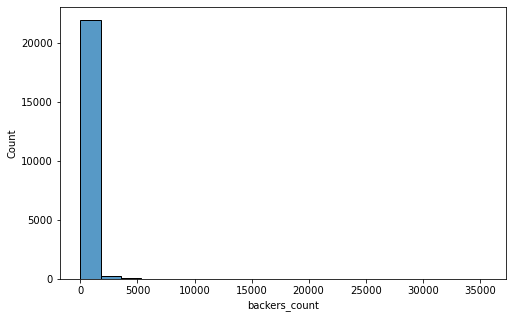

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(data= new_df['backers_count'], bins = 20)

<AxesSubplot:xlabel='backers_count'>

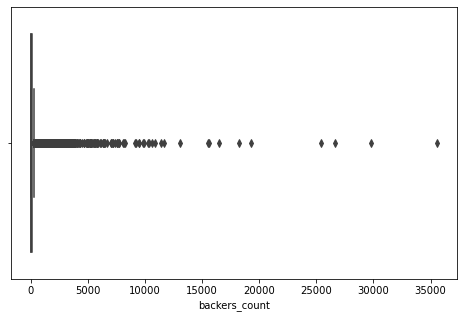

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data= new_df, x = 'backers_count')

## Correlation Matrix

Create subset dataset for correlation matrix by including only numerical variables

In [ ]:
subset_df = new_df[['backers_count','day_duration','week_duration','goal','pledged']]

Compute the correlation matrix

In [ ]:
corr = subset_df.corr()

In [ ]:
print(corr)

               backers_count  day_duration  week_duration      goal   pledged
backers_count       1.000000      0.011824       0.011824 -0.000720  0.265347
day_duration        0.011824      1.000000       1.000000  0.008841  0.037055
week_duration       0.011824      1.000000       1.000000  0.008841  0.037055
goal               -0.000720      0.008841       0.008841  1.000000  0.041204
pledged             0.265347      0.037055       0.037055  0.041204  1.000000


<AxesSubplot:xlabel='pledged'>

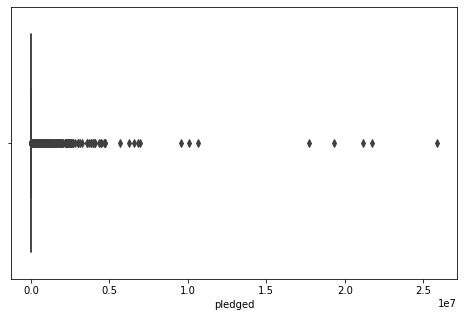

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data= subset_df, x = 'pledged')

Find the boundary to remove the outlier for pledged 

In [ ]:
print("Highest allowed",subset_df['pledged'].mean() + 3*subset_df['pledged'].std())
print("Lowest allowed",subset_df['pledged'].mean() - 3*subset_df['pledged'].std())

Highest allowed 1208551.3671053762
Lowest allowed -1141401.691298939


In [ ]:
subset_df = subset_df[(subset_df['pledged'] < 1182907) & (subset_df['pledged'] > -1116293)]

Find the boundary to remove the outlier for goal

In [ ]:
print("Highest allowed",subset_df['goal'].mean() + 3*subset_df['goal'].std())
print("Lowest allowed",subset_df['goal'].mean() - 3*subset_df['goal'].std())

Highest allowed 2793961.423689074
Lowest allowed -2711323.874787762


In [ ]:
subset_df = subset_df[(subset_df['goal'] < 2737746) & (subset_df['goal'] > -2651305)]

Compute the correlation matrix after removing the outlier

In [ ]:
corr = subset_df.corr()

In [ ]:
print(corr)

               backers_count  day_duration  week_duration      goal   pledged
backers_count       1.000000     -0.000591      -0.000591  0.022696  0.571595
day_duration       -0.000591      1.000000       1.000000  0.082524  0.022644
week_duration      -0.000591      1.000000       1.000000  0.082524  0.022644
goal                0.022696      0.082524       0.082524  1.000000  0.167069
pledged             0.571595      0.022644       0.022644  0.167069  1.000000


<AxesSubplot:>

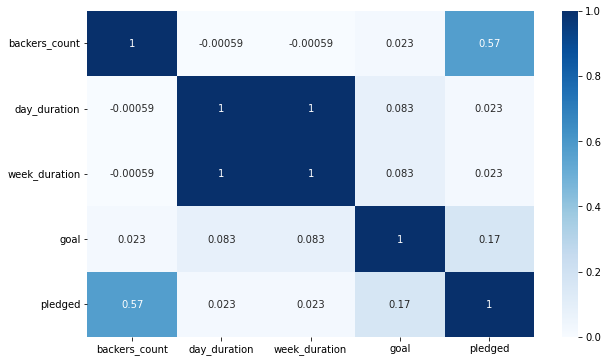

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,cmap="Blues",annot=True)

<AxesSubplot:xlabel='state', ylabel='count'>

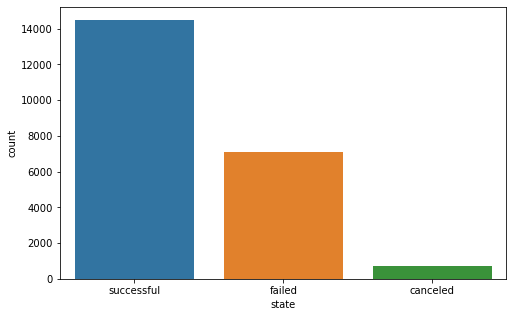

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x='state', data = new_df, order = new_df['state'].value_counts().index)

Top 10 kickstart project categories

In [ ]:
cat = new_df['project_category'].value_counts().reset_index()
cat = cat.sort_values(by = 'project_category', ascending = False).head(10)
cat.rename(columns={'index':'category','project_category':'count'},inplace=True)

<AxesSubplot:xlabel='count', ylabel='category'>

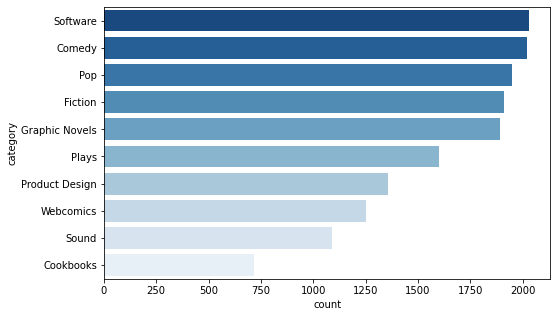

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x= 'count',y='category',data = cat, palette = "Blues_r")

In [ ]:
df['project_category'].value_counts().head(10)

Software          2052
Comedy            2040
Fiction           1956
Pop               1956
Graphic Novels    1932
Plays             1608
Product Design    1600
Webcomics         1260
Sound             1099
Cookbooks          718
Name: project_category, dtype: int64

Top 10 Projects by country

<AxesSubplot:xlabel='country', ylabel='count'>

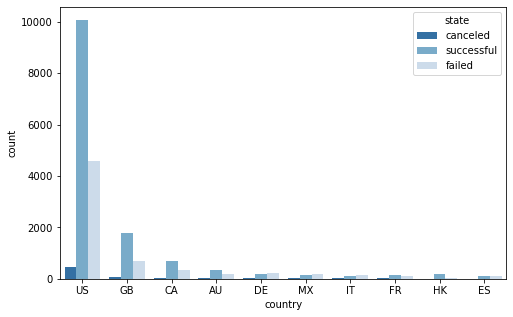

In [ ]:
plt.figure(figsize = (8,5))
top_10_countries = new_df['country'].value_counts().nlargest(10).index
sns.countplot(x='country',data = new_df, hue = 'state', palette = "Blues_r",order = top_10_countries)

Analyze the amount of projects by year

<AxesSubplot:xlabel='year', ylabel='count'>

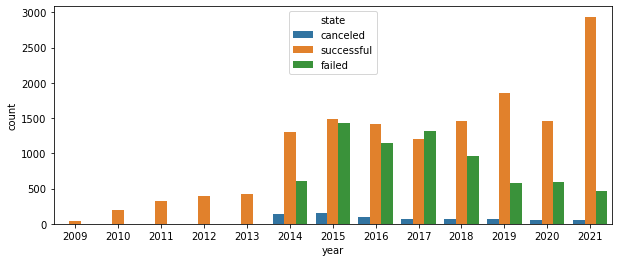

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(x='year',data = new_df, hue = 'state')

<AxesSubplot:xlabel='week_duration'>

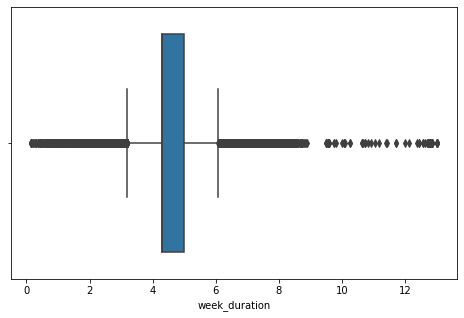

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'week_duration', data = new_df)

<Figure size 576x360 with 0 Axes>

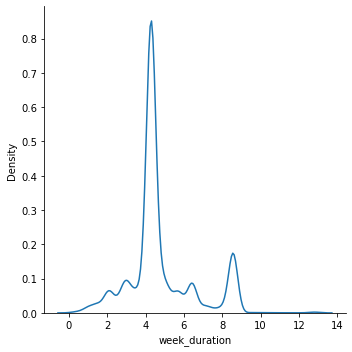

In [ ]:
plt.figure(figsize = (8,5))
sns.displot(x='week_duration', data = new_df,kind='kde')

<AxesSubplot:xlabel='year'>

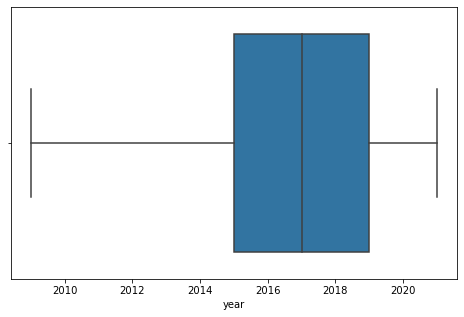

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'year', data = new_df)

<Figure size 576x360 with 0 Axes>

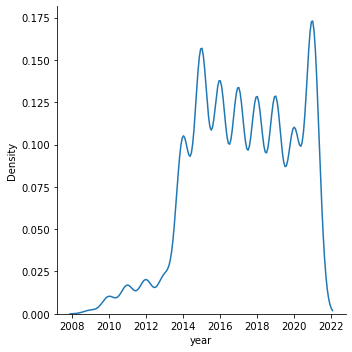

In [ ]:
plt.figure(figsize = (8,5))
sns.displot(x='year', data = new_df,kind='kde')

# Data Analysis

Create subset data for named tree_df for the decision tree classification

In [ ]:
tree_df = new_df[['backers_count','project_category','year','day_duration','goal','pledged','spotlight','staff_pick','state']]

NameError: ignored

In [ ]:
tree_df

backers_count project_category  year  day_duration      goal   pledged  \
0                  1            Audio  2020     60.000000     200.0       1.0   
1                  0        Cookbooks  2014     30.000000    5000.0       0.0   
2                 27          Fiction  2021     60.000000    1500.0    1697.0   
3                179          Fiction  2021     30.000000    1500.0   13675.0   
4                  3            Sound  2015     30.000000  125000.0       3.0   
...              ...              ...   ...           ...       ...       ...   
22875            102            Sound  2021     31.164329   30000.0   40693.0   
22876           1017            Sound  2021     40.000000    5000.0  112677.0   
22877             70            Sound  2021     30.000000   20000.0   40243.0   
22878            814            Sound  2021     30.000000   50000.0  431693.0   
22883            277   Graphic Design  2021     51.252824   16800.0   20691.5   

       spotlight  staff_pick       state  
0          False       False    canceled  
1          False       False    canceled  
2           True       False  successful  
3           True        True  successful  
4          False       False      failed  
...          ...         ...         ...  
22875       True       False  successful  
22876       True       False  successful  
22877       True       False  successful  
22878       True       False  successful  
22883       True        True  successful  

[22277 rows x 9 columns]

### Label Encoding for Project Cateogory

In [ ]:
data = pd.get_dummies(tree_df, columns=["project_category","year"], prefix=["project_category","year"], prefix_sep="_")
data['state'] = data['state'].replace({'successful':1,'failed':0,'canceled':2})
data

backers_count  day_duration      goal   pledged  spotlight  staff_pick  \
0                  1     60.000000     200.0       1.0      False       False   
1                  0     30.000000    5000.0       0.0      False       False   
2                 27     60.000000    1500.0    1697.0       True       False   
3                179     30.000000    1500.0   13675.0       True        True   
4                  3     30.000000  125000.0       3.0      False       False   
...              ...           ...       ...       ...        ...         ...   
22875            102     31.164329   30000.0   40693.0       True       False   
22876           1017     40.000000    5000.0  112677.0       True       False   
22877             70     30.000000   20000.0   40243.0       True       False   
22878            814     30.000000   50000.0  431693.0       True       False   
22883            277     51.252824   16800.0   20691.5       True        True   

       state  project_category_Architecture  project_category_Audio  \
0          2                              0                       1   
1          2                              0                       0   
2          1                              0                       0   
3          1                              0                       0   
4          0                              0                       0   
...      ...                            ...                     ...   
22875      1                              0                       0   
22876      1                              0                       0   
22877      1                              0                       0   
22878      1                              0                       0   
22883      1                              0                       0   

       project_category_Bacon  ...  year_2012  year_2013  year_2014  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          0          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   
...                       ...  ...        ...        ...        ...   
22875                       0  ...          0          0          0   
22876                       0  ...          0          0          0   
22877                       0  ...          0          0          0   
22878                       0  ...          0          0          0   
22883                       0  ...          0          0          0   

       year_2015  year_2016  year_2017  year_2018  year_2019  year_2020  \
0              0          0          0          0          0          1   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
22875          0          0          0          0          0          0   
22876          0          0          0          0          0          0   
22877          0          0          0          0          0          0   
22878          0          0          0          0          0          0   
22883          0          0          0          0          0          0   

       year_2021  
0              0  
1              0  
2              1  
3              1  
4              0  
...          ...  
22875          1  
22876          1  
22877          1  
22878          1  
22883          1  

[22277 rows x 60 columns]

### Encoding Binary columns

In [ ]:
columns_to_encode = ["spotlight", "staff_pick"]
for column in columns_to_encode:
    data[column].replace({True: 1, False: 0}, inplace=True)

In [ ]:
data

backers_count  day_duration      goal   pledged  spotlight  staff_pick  \
0                  1     60.000000     200.0       1.0          0           0   
1                  0     30.000000    5000.0       0.0          0           0   
2                 27     60.000000    1500.0    1697.0          1           0   
3                179     30.000000    1500.0   13675.0          1           1   
4                  3     30.000000  125000.0       3.0          0           0   
...              ...           ...       ...       ...        ...         ...   
22875            102     31.164329   30000.0   40693.0          1           0   
22876           1017     40.000000    5000.0  112677.0          1           0   
22877             70     30.000000   20000.0   40243.0          1           0   
22878            814     30.000000   50000.0  431693.0          1           0   
22883            277     51.252824   16800.0   20691.5          1           1   

       state  project_category_Architecture  project_category_Audio  \
0          2                              0                       1   
1          2                              0                       0   
2          1                              0                       0   
3          1                              0                       0   
4          0                              0                       0   
...      ...                            ...                     ...   
22875      1                              0                       0   
22876      1                              0                       0   
22877      1                              0                       0   
22878      1                              0                       0   
22883      1                              0                       0   

       project_category_Bacon  ...  year_2012  year_2013  year_2014  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          0          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   
...                       ...  ...        ...        ...        ...   
22875                       0  ...          0          0          0   
22876                       0  ...          0          0          0   
22877                       0  ...          0          0          0   
22878                       0  ...          0          0          0   
22883                       0  ...          0          0          0   

       year_2015  year_2016  year_2017  year_2018  year_2019  year_2020  \
0              0          0          0          0          0          1   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
22875          0          0          0          0          0          0   
22876          0          0          0          0          0          0   
22877          0          0          0          0          0          0   
22878          0          0          0          0          0          0   
22883          0          0          0          0          0          0   

       year_2021  
0              0  
1              0  
2              1  
3              1  
4              0  
...          ...  
22875          1  
22876          1  
22877          1  
22878          1  
22883          1  

[22277 rows x 85 columns]

In [ ]:
corr = data.corr()
corr

backers_count  day_duration      goal  \
backers_count                             1.000000      0.011824 -0.000720   
day_duration                              0.011824      1.000000  0.008841   
goal                                     -0.000720      0.008841  1.000000   
pledged                                   0.265347      0.037055  0.041204   
spotlight                                 0.164346     -0.171736 -0.044111   
staff_pick                                0.216237     -0.056488 -0.007917   
state                                     0.125719     -0.116124 -0.035554   
project_category_Architecture             0.002622     -0.005394  0.000091   
project_category_Audio                   -0.026157      0.004153 -0.002945   
project_category_Bacon                   -0.020080      0.003567 -0.001623   
project_category_Civic Design             0.001496      0.006971 -0.000166   
project_category_Comedy                  -0.027772     -0.035269 -0.000471   
project_category_Community Gardens       -0.027307      0.039686  0.007514   
project_category_Cookbooks               -0.017978      0.012030 -0.002790   
project_category_Design                   0.029449     -0.033752 -0.002299   
project_category_Drinks                   0.004295      0.008689 -0.003483   
project_category_Events                  -0.001568      0.005844 -0.000916   
project_category_Farmer's Markets        -0.000164      0.016693 -0.000787   
project_category_Farms                   -0.004224      0.001678 -0.001787   
project_category_Fiction                 -0.016434     -0.070474 -0.013152   
project_category_Food                     0.045427     -0.001739 -0.003750   
project_category_Food Trucks             -0.004070     -0.003272 -0.001688   
project_category_Graphic Design           0.021538     -0.016942 -0.000799   
project_category_Graphic Novels           0.046731     -0.075118 -0.011988   
project_category_Interactive Design       0.005219     -0.002844 -0.000552   
project_category_Journalism              -0.011772      0.036971 -0.003908   
project_category_Letterpress             -0.005530     -0.009380 -0.002419   
project_category_Literary Journals       -0.015546      0.006647 -0.004350   
project_category_Literary Spaces         -0.005608      0.022443 -0.000903   
project_category_Photo                   -0.019069      0.001638 -0.002356   
project_category_Plays                   -0.051675     -0.037935 -0.009324   
project_category_Pop                     -0.037961      0.039353 -0.007571   
project_category_Print                   -0.014812      0.019067 -0.003999   
project_category_Product Design           0.156192     -0.008995 -0.003877   
project_category_Punk                    -0.024103      0.034959 -0.004496   
project_category_R&B                     -0.035651      0.018696 -0.006079   
project_category_Restaurants              0.007275     -0.003093 -0.000138   
project_category_Small Batch             -0.004482     -0.002887 -0.003264   
project_category_Software                -0.024552      0.065928  0.054368   
project_category_Sound                    0.049388      0.023342  0.007811   
project_category_Spaces                  -0.011519      0.021832  0.021009   
project_category_Toys                     0.028929     -0.013207 -0.000761   
project_category_Typography               0.000003     -0.009518 -0.000413   
project_category_Vegan                    0.005476     -0.000020 -0.002416   
project_category_Video                   -0.015711      0.009913  0.004841   
project_category_Web                     -0.019736      0.038196 -0.001687   
project_category_Webcomics                0.025911     -0.017975 -0.006759   
year_2009                                -0.006471      0.077121 -0.001882   
year_2010                                -0.007814      0.098906 -0.004132   
year_2011                                -0.013182      0.042095 -0.005102   
year_2012                                -0.000601     -0.0

# Perform the Decision Tree Classification

### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

#define the input and target variables 
X = data[data.columns.difference(['state'])]
y = data.state

#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)
X

backers_count  day_duration      goal   pledged  \
0                  1     60.000000     200.0       1.0   
1                  0     30.000000    5000.0       0.0   
2                 27     60.000000    1500.0    1697.0   
3                179     30.000000    1500.0   13675.0   
4                  3     30.000000  125000.0       3.0   
...              ...           ...       ...       ...   
22875            102     31.164329   30000.0   40693.0   
22876           1017     40.000000    5000.0  112677.0   
22877             70     30.000000   20000.0   40243.0   
22878            814     30.000000   50000.0  431693.0   
22883            277     51.252824   16800.0   20691.5   

       project_category_Architecture  project_category_Audio  \
0                                  0                       1   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
22875                              0                       0   
22876                              0                       0   
22877                              0                       0   
22878                              0                       0   
22883                              0                       0   

       project_category_Bacon  project_category_Civic Design  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
22875                       0                              0   
22876                       0                              0   
22877                       0                              0   
22878                       0                              0   
22883                       0                              0   

       project_category_Comedy  project_category_Community Gardens  ...  \
0                            0                                   0  ...   
1                            0                                   0  ...   
2                            0                                   0  ...   
3                            0                                   0  ...   
4                            0                                   0  ...   
...                        ...                                 ...  ...   
22875                        0                                   0  ...   
22876                        0                                   0  ...   
22877                        0                                   0  ...   
22878                        0                                   0  ...   
22883                        0                                   0  ...   

       year_2012  year_2013  year_2014  year_2015  year_2016  year_2017  \
0              0          0          0          0          0          0   
1              0          0          1          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
22875          0          0          0          0          0          0   
22876          0          0          0          0          0          0   
22877          0          0          0          0          0          0   
22878          0          0          0          0          0          0   
22883          0          0          0        

### Fitting the decision tree classifier

In [ ]:
from sklearn import tree

#define classification algorithm
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X_train, y_train)

y_pred_tree = clf_tree.predict(X_test)

### Plotting the decision tree

In [ ]:
#plotting the decision tree
cols = data.columns
feature_names = cols[~cols.isin(['state'])].to_list()
class_names = ['Successful','Failed','Canceled']
tree.plot_tree(clf_tree, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

NameError: ignored

### Evaluate the Performance

Confusion Matrix

[[2334    0    7]
 [   0 4782    0]
 [ 226    0    3]]


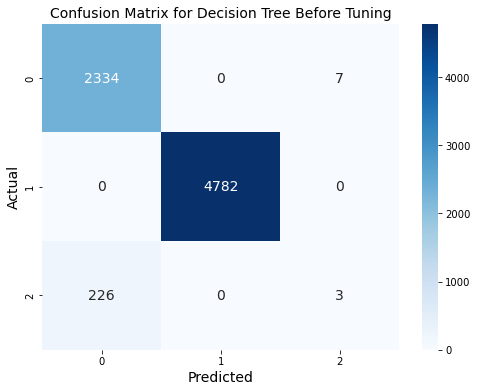

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_tree)
print(confusion_mat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree Before Tuning', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.30      0.01      0.03       229

    accuracy                           0.97      7352
   macro avg       0.74      0.67      0.66      7352
weighted avg       0.95      0.97      0.95      7352



### Feature Importance

In [ ]:
feature_imp_tree = pd.Series(clf_tree.feature_importances_, index = cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_tree

project_category_Web               0.992094
project_category_Small Batch       0.004593
project_category_Restaurants       0.002244
backers_count                      0.001069
project_category_Product Design    0.000000
project_category_Punk              0.000000
project_category_R&B               0.000000
project_category_Software          0.000000
project_category_Sound             0.000000
project_category_Spaces            0.000000
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


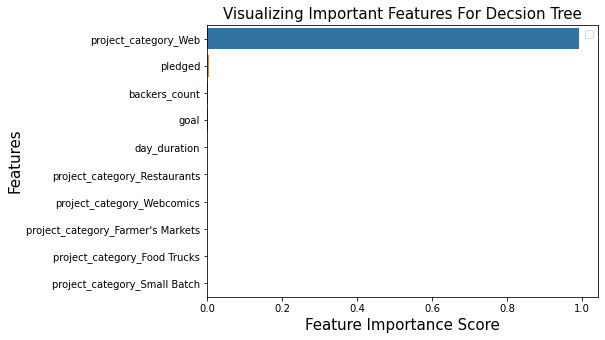

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_tree, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Decsion Tree", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Create a GridSearchCV object
grid_search_tree = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
df_cv_results_tree = pd.DataFrame(grid_search_tree.cv_results_)
df_cv_results_tree.sort_values(by = 'rank_test_score', inplace = True)
df_cv_results_tree[['param_max_depth','param_min_samples_leaf','param_min_samples_split','rank_test_score']]

param_max_depth param_min_samples_leaf param_min_samples_split  \
73               10                      1                       5   
78               10                      4                       2   
75               10                      2                       2   
96               15                      4                       2   
106              15                      4                       5   
..              ...                    ...                     ...   
26                3                      4                      10   
21                3                      2                       2   
11                3                      1                      10   
7                 3                      4                       5   
8                 3                      4                      10   

     rank_test_score  
73                 1  
78                 2  
75                 3  
96                 4  
106                5  
..               ...  
26               104  
21               105  
11               106  
7                107  
8                108  

[108 rows x 4 columns]

### Final Model

In [ ]:
from sklearn import tree

#define classification algorithm
clf_tree_new = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split= 5)
clf_tree_new = clf_tree_new.fit(X_train, y_train)

y_pred_tree_new = clf_tree_new.predict(X_test)

### Plotting the Decision Tree

In [ ]:
#plotting the decision tree
cols = data.columns
feature_names = cols[~cols.isin(['state'])].to_list()
class_names = ['Successful','Failed','Canceled']
plt.figure(figsize=(500,200))
tree.plot_tree(clf_tree_new, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

### Evaluate the Performance

[[2330    0   11]
 [   0 4782    0]
 [ 218    0   11]]


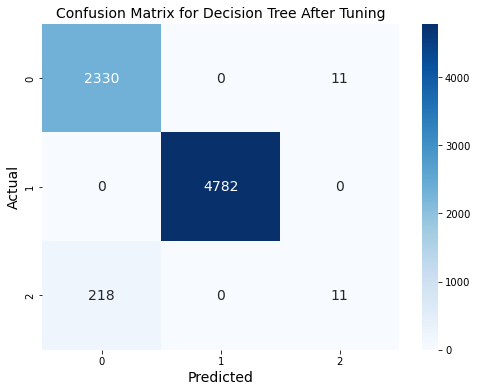

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat_new = confusion_matrix(y_test, y_pred_tree_new)
print(confusion_mat_new)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree After Tuning', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rdm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.42      0.10      0.16       229

    accuracy                           0.97      7352
   macro avg       0.78      0.69      0.70      7352
weighted avg       0.96      0.97      0.96      7352



# Perform Random Forest Classification

### Fitting the Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
clf_rdm = RandomForestClassifier(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
clf_rdm = clf_rdm.fit(X_train, y_train)  

y_pred_rdm = clf_rdm.predict(X_test)

### Evaluate the Performance

[[2311    0   30]
 [   0 4782    0]
 [ 207    0   22]]


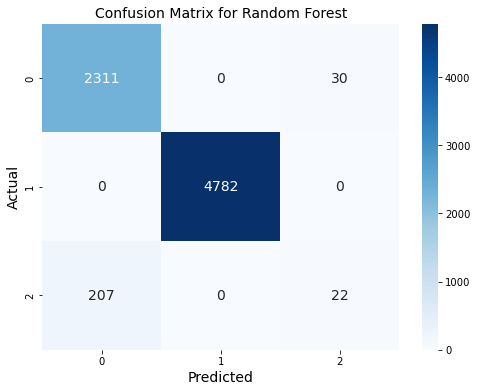

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rdm = confusion_matrix(y_test, y_pred_rdm)
print(confusion_matrix_rdm)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rdm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Random Forest', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rdm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.42      0.10      0.16       229

    accuracy                           0.97      7352
   macro avg       0.78      0.69      0.70      7352
weighted avg       0.96      0.97      0.96      7352



### Features Importance

In [ ]:
feature_imp_rdm = pd.Series(clf_rdm.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_rdm

project_category_Web                 0.453342
pledged                              0.169562
backers_count                        0.163043
goal                                 0.066612
day_duration                         0.027762
project_category_Restaurants         0.018021
project_category_Webcomics           0.014812
project_category_Farmer's Markets    0.012855
project_category_Food Trucks         0.006243
project_category_Small Batch         0.005824
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


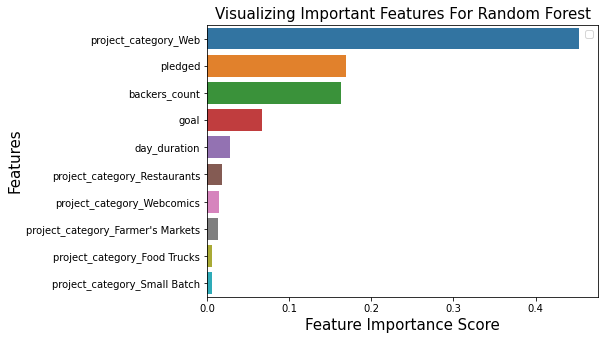

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_rdm, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Random Forest", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Keeping Top 4 Features

In [ ]:
#define the input and target variables 
X1 = data[['project_category_Web','pledged','backers_count','goal']]
y1 = data.state

#split training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.33, random_state = 5, stratify=y)

### Fitting the Random Forest classifier on New Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
clf_rdm_new = RandomForestClassifier(n_estimators = 100, random_state = 5)
  
clf_rdm_new = clf_rdm_new.fit(X1_train, y1_train)  

[[2316   13   12]
 [   0 4781    1]
 [ 124    5  100]]


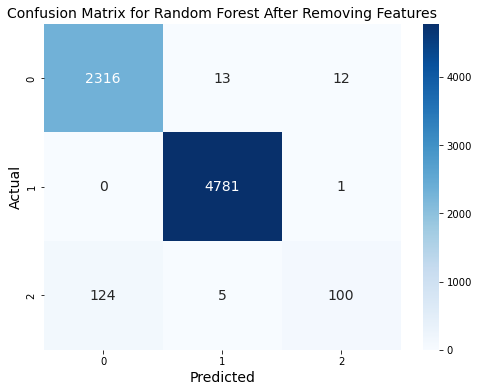

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_rdm_new = clf_rdm_new.predict(X1_test)

# Calculate the confusion matrix
conf_matrix_rdm_new = confusion_matrix(y1_test, y_pred_rdm_new)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_rdm_new)


# Create a heatmap
sns.heatmap(conf_matrix_rdm_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted',fontsize = 14)
plt.ylabel('Actual',fontsize = 14)
plt.title('Confusion Matrix for Random Forest After Removing Features',fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_rdm_new))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2341
           1       1.00      1.00      1.00      4782
           2       0.88      0.44      0.58       229

    accuracy                           0.98      7352
   macro avg       0.94      0.81      0.85      7352
weighted avg       0.98      0.98      0.98      7352



# Perform Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbm = GradientBoostingClassifier(n_estimators=1000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

clf_gbm.fit(X_train, y_train.values.ravel())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7355           0.0243           31.66s
         2           0.6955           0.0341           24.84s
         3           0.6652           0.0280           20.55s
         4           0.6605           0.0055           18.80s
         5           0.6163           0.0383           17.45s
         6           0.5851           0.0331           16.59s
         7           0.5763           0.0089           15.93s
         8           0.5612           0.0146           15.26s
         9           0.5407           0.0265           14.94s
        10           0.4963           0.0342           14.53s
        20           0.3688           0.0066           14.97s
        30           0.3026           0.0024           13.82s
        40           0.2461           0.0091           13.15s
        50           0.2156           0.0016           13.27s
        60           0.1819           0.0058           13.11s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=1000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

### Evaluate the Performance

[[2326    0   15]
 [   0 4782    0]
 [ 213    0   16]]


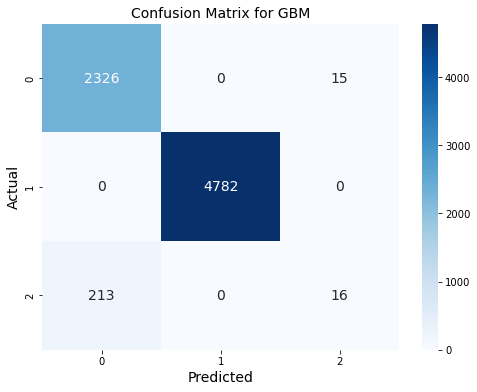

In [ ]:
# Generate predictions
y_pred_gbm = clf_gbm.predict(X_test)

# Calculate the confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_gbm)

# Create a heatmap
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for GBM', fontsize = 14)
# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.52      0.07      0.12       229

    accuracy                           0.97      7352
   macro avg       0.81      0.69      0.69      7352
weighted avg       0.96      0.97      0.96      7352



### Features Importance

In [ ]:
feature_imp_gbm = pd.Series(clf_gbm.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_gbm

project_category_Web                 0.478593
backers_count                        0.198771
pledged                              0.160852
goal                                 0.036666
project_category_Restaurants         0.023752
project_category_Webcomics           0.013327
day_duration                         0.010374
project_category_Farmer's Markets    0.009472
project_category_Food Trucks         0.009195
project_category_Pop                 0.007418
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


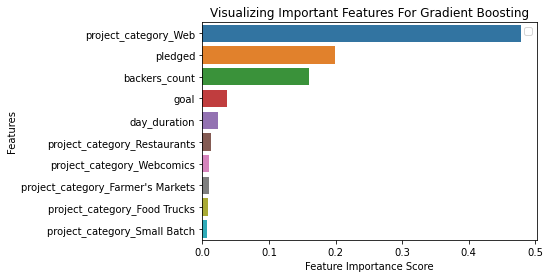

In [ ]:
sns.barplot(x=feature_imp_gbm, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Gradient Boosting")
plt.legend()
plt.show()

### Optimizing the Model by Keeping Top 4 Features

In [ ]:
#define the input and target variables 
X2 = data[['project_category_Web','pledged','backers_count','goal']]
y2 = data.state

#split training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33, random_state = 10, stratify=y)

### Fitting the Random Forest classifier on New Model

In [ ]:
clf_gbm_new = GradientBoostingClassifier(n_estimators=1000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

clf_gdm_new = clf_gdm_new.fit(X2_train, y2_train) 

[[2290   26   25]
 [   0 4781    1]
 [ 214   12    3]]


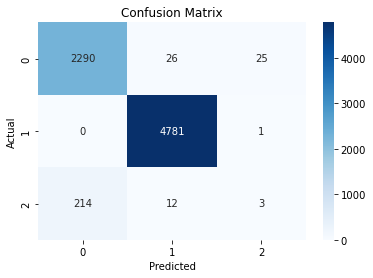

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_gdm_new = clf_gdm_new.predict(X2_test)

# Calculate the confusion matrix
conf_matrix_gdm_new = confusion_matrix(y2_test, y_pred_gdm_new)

# Print the confusion matrix
print(conf_matrix_gdm_new)

# Create a heatmap
sns.heatmap(conf_matrix_gdm_new, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gdm_new))

              precision    recall  f1-score   support

           0       0.32      0.35      0.33      2341
           1       0.65      0.66      0.65      4782
           2       0.03      0.00      0.01       229

    accuracy                           0.54      7352
   macro avg       0.34      0.34      0.33      7352
weighted avg       0.53      0.54      0.53      7352



# Perform XGBoost Classification

In [ ]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(objective = 'multi:softmax', 
                        eval_metric = 'merror',
                        learning_rate = 0.1, 
                        max_depth = 5, 
                        n_estimators = 5000, 
                        verbosity = 1,
                        seed = 42)
clf_xgb.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_set = [(X_test, y_test)])

[0]	validation_0-merror:0.03237
[1]	validation_0-merror:0.03169
[2]	validation_0-merror:0.03156


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-merror:0.03169
[4]	validation_0-merror:0.03169
[5]	validation_0-merror:0.03142
[6]	validation_0-merror:0.03156
[7]	validation_0-merror:0.03115
[8]	validation_0-merror:0.03115
[9]	validation_0-merror:0.03128
[10]	validation_0-merror:0.03128
[11]	validation_0-merror:0.03128
[12]	validation_0-merror:0.03128
[13]	validation_0-merror:0.03115
[14]	validation_0-merror:0.03115
[15]	validation_0-merror:0.03115
[16]	validation_0-merror:0.03115


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

### Evaluate the Performance

[[2338    0    3]
 [   0 4782    0]
 [ 226    0    3]]


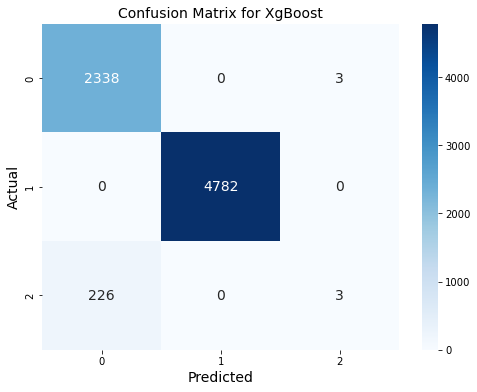

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_xgb = clf_xgb.predict(X_test)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print(conf_matrix_xgb)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual' , fontsize = 14)
plt.title('Confusion Matrix for XgBoost' , fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.50      0.01      0.03       229

    accuracy                           0.97      7352
   macro avg       0.80      0.67      0.66      7352
weighted avg       0.96      0.97      0.95      7352



### Features Importance

In [ ]:
feature_imp_xgb = pd.Series(clf_xgb.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_xgb

project_category_Web                0.938719
project_category_Small Batch        0.010196
project_category_Restaurants        0.007490
project_category_Photo              0.006263
project_category_Vegan              0.006257
project_category_Literary Spaces    0.005640
project_category_Bacon              0.004399
pledged                             0.003318
staff_pick                          0.003208
project_category_Comedy             0.003119
dtype: float32

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


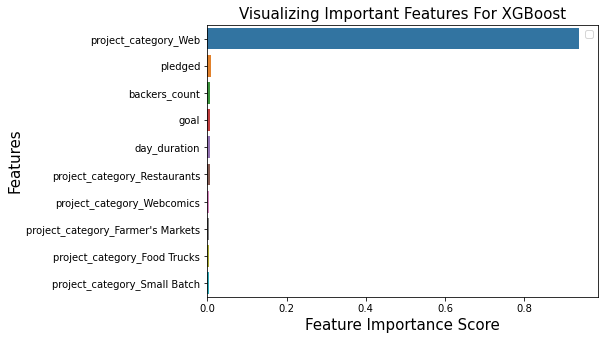

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_xgb, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For XGBoost", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 500, 1000]}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(clf_xgb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X,y)

In [ ]:
df_cv_results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
df_cv_results_xgb.sort_values(by = ['rank_test_score','param_learning_rate'],inplace=True)
df_cv_results_xgb[['param_learning_rate','param_max_depth','param_n_estimators','rank_test_score']]

param_learning_rate param_max_depth param_n_estimators  rank_test_score
9                 0.01               3                100                1
20               0.001               3               1000                1
10                0.01               3                500                3
18               0.001               3                100                4
19               0.001               3                500                5
12                0.01               5                100                6
23               0.001               5               1000                6
22               0.001               5                500                8
21               0.001               5                100                9
11                0.01               3               1000               10
0                  0.1               3                100               11
24               0.001               7                100               12
13                0.01               5                500               13
15                0.01               7                100               14
25               0.001               7                500               15
26               0.001               7               1000               16
14                0.01               5               1000               17
8                  0.1               7               1000               18
16                0.01               7                500               19
5                  0.1               5               1000               20
3                  0.1               5                100               21
7                  0.1               7                500               22
1                  0.1               3                500               23
6                  0.1               7                100               24
17                0.01               7               1000               25
4                  0.1               5                500               26
2                  0.1               3               1000               27

### Final Model

In [ ]:
from xgboost import XGBClassifier
params = {'objective': 'multi:softmax', 'num_class':3, 'eval_metric': 'merror'}
clf_xgb_new = XGBClassifier(objective = 'multi:softmax', 
                        eval_metric = 'merror',
                        learning_rate = 0.01, 
                        max_depth = 3, 
                        n_estimators = 100, 
                        verbosity = 1,
                        seed = 42)
clf_xgb_new.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_set = [(X_test, y_test)])

[0]	validation_0-merror:0.03169
[1]	validation_0-merror:0.03169
[2]	validation_0-merror:0.03169
[3]	validation_0-merror:0.03169
[4]	validation_0-merror:0.03169


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-merror:0.03169
[6]	validation_0-merror:0.03169
[7]	validation_0-merror:0.03169
[8]	validation_0-merror:0.03169
[9]	validation_0-merror:0.03169


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

### Evaluate the Performance of the Final Model

[[2334    0    7]
 [   0 4782    0]
 [ 226    0    3]]


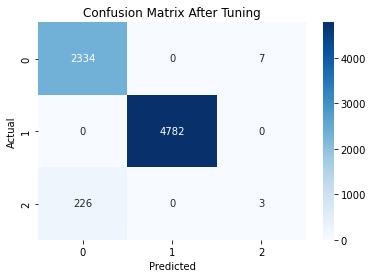

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_xgb_new = clf_xgb_new.predict(X_test)

# Calculate the confusion matrix
conf_matrix_new = confusion_matrix(y_test, y_pred_xgb_new)

# Print the confusion matrix
print(conf_matrix_new)

# Create a heatmap
sns.heatmap(conf_matrix_new , annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After Tuning')

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_new))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.30      0.01      0.03       229

    accuracy                           0.97      7352
   macro avg       0.74      0.67      0.66      7352
weighted avg       0.95      0.97      0.95      7352



# Perform CatBoost Classification

In [ ]:
from catboost import CatBoostClassifier, Pool

catboost_train_data = Pool(X_train, y_train)
clf_cat = CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1,loss_function='MultiClass')
clf_cat.fit(catboost_train_data, plot = True)

y_pred_cat = clf_cat.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9256230	total: 3.69ms	remaining: 181ms
1:	learn: 0.7968330	total: 5.88ms	remaining: 141ms
2:	learn: 0.6960387	total: 8.51ms	remaining: 133ms
3:	learn: 0.6148056	total: 10.9ms	remaining: 125ms
4:	learn: 0.5474205	total: 13ms	remaining: 117ms
5:	learn: 0.4914186	total: 15ms	remaining: 110ms
6:	learn: 0.4441220	total: 16.8ms	remaining: 103ms
7:	learn: 0.4036517	total: 21.7ms	remaining: 114ms
8:	learn: 0.3683805	total: 25.8ms	remaining: 118ms
9:	learn: 0.3380891	total: 28.2ms	remaining: 113ms
10:	learn: 0.3118655	total: 30.2ms	remaining: 107ms
11:	learn: 0.2888778	total: 32.2ms	remaining: 102ms
12:	learn: 0.2685871	total: 34.3ms	remaining: 97.6ms
13:	learn: 0.2502477	total: 36.8ms	remaining: 94.7ms
14:	learn: 0.2344443	total: 38.8ms	remaining: 90.5ms
15:	learn: 0.2201240	total: 41.8ms	remaining: 88.9ms
16:	learn: 0.2073929	total: 43.7ms	remaining: 84.8ms
17:	learn: 0.1961931	total: 45.8ms	remaining: 81.4ms
18:	learn: 0.1864037	total: 48ms	remaining: 78.4ms
19:	learn: 0.1776174	

### Evaluate the Performance

[[2341    0    0]
 [   0 4782    0]
 [ 229    0    0]]


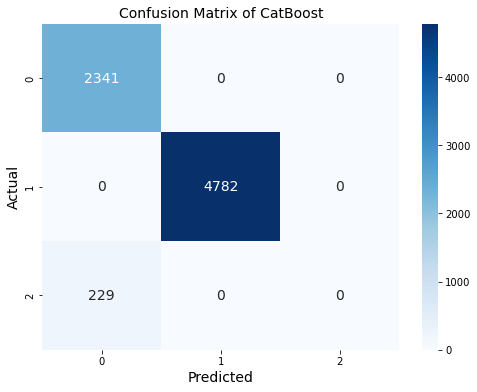

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_cat = clf_cat.predict(X_test)

# Calculate the confusion matrix
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)

# Print the confusion matrix
print(conf_matrix_cat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of CatBoost', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.00      0.00      0.00       229

    accuracy                           0.97      7352
   macro avg       0.64      0.67      0.65      7352
weighted avg       0.94      0.97      0.95      7352



/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [ ]:
feature_imp_cat = pd.Series(clf_cat.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_cat

project_category_Web            93.514120
backers_count                    2.328924
pledged                          1.496342
project_category_Restaurants     0.958468
project_category_Small Batch     0.477483
project_category_Bacon           0.242680
goal                             0.172807
project_category_Comedy          0.141694
year_2014                        0.118931
year_2017                        0.083597
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


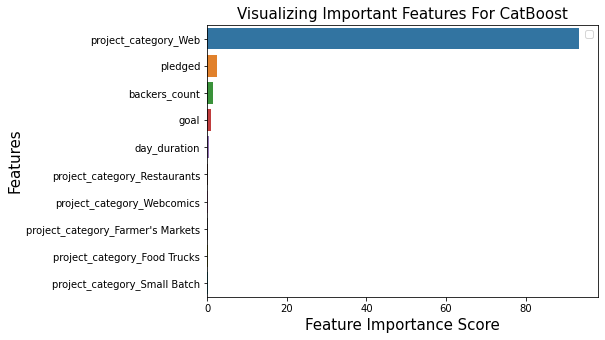

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_cat, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For CatBoost", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'iterations': [50, 100, 150],
              'depth': [3, 4, 5],
              'learning_rate': [0.1, 0.3, 0.5]}

# Create a GridSearchCV object
grid_search_cat = GridSearchCV(clf_cat, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_cat.fit(X,y)

0:	learn: 0.9255708	total: 8.28ms	remaining: 406ms
1:	learn: 0.7966909	total: 10.8ms	remaining: 259ms
2:	learn: 0.6958749	total: 13ms	remaining: 204ms
3:	learn: 0.6146261	total: 15.1ms	remaining: 173ms
4:	learn: 0.5471241	total: 17.4ms	remaining: 156ms
5:	learn: 0.4911345	total: 19.5ms	remaining: 143ms
6:	learn: 0.4426667	total: 21.9ms	remaining: 135ms
7:	learn: 0.4022067	total: 24.4ms	remaining: 128ms
8:	learn: 0.3667591	total: 26.7ms	remaining: 122ms
9:	learn: 0.3364735	total: 29.4ms	remaining: 117ms
10:	learn: 0.3102302	total: 32.6ms	remaining: 115ms
11:	learn: 0.2863294	total: 35.3ms	remaining: 112ms
12:	learn: 0.2649596	total: 37.9ms	remaining: 108ms
13:	learn: 0.2464908	total: 40.6ms	remaining: 104ms
14:	learn: 0.2298519	total: 43.1ms	remaining: 101ms
15:	learn: 0.2154628	total: 45.7ms	remaining: 97.2ms
16:	learn: 0.2025993	total: 48.9ms	remaining: 95ms
17:	learn: 0.1909740	total: 51.6ms	remaining: 91.7ms
18:	learn: 0.1803279	total: 53.9ms	remaining: 87.9ms
19:	learn: 0.1708388	t

2:	learn: 0.6958194	total: 7.08ms	remaining: 111ms
3:	learn: 0.6145655	total: 9.44ms	remaining: 109ms
4:	learn: 0.5470179	total: 11.8ms	remaining: 106ms
5:	learn: 0.4910291	total: 14.7ms	remaining: 108ms
6:	learn: 0.4437312	total: 17.6ms	remaining: 108ms
7:	learn: 0.4032524	total: 21.3ms	remaining: 112ms
8:	learn: 0.3679875	total: 23.5ms	remaining: 107ms
9:	learn: 0.3376814	total: 26.1ms	remaining: 104ms
10:	learn: 0.3114487	total: 28.8ms	remaining: 102ms
11:	learn: 0.2884754	total: 30.9ms	remaining: 98ms
12:	learn: 0.2680786	total: 34.3ms	remaining: 97.5ms
13:	learn: 0.2496021	total: 36.9ms	remaining: 94.9ms
14:	learn: 0.2337978	total: 39.3ms	remaining: 91.8ms
15:	learn: 0.2196987	total: 41.8ms	remaining: 88.9ms
16:	learn: 0.2071470	total: 44.2ms	remaining: 85.7ms
17:	learn: 0.1958554	total: 46.8ms	remaining: 83.2ms
18:	learn: 0.1850693	total: 49.3ms	remaining: 80.4ms
19:	learn: 0.1756255	total: 51.6ms	remaining: 77.5ms
20:	learn: 0.1674550	total: 54.4ms	remaining: 75.1ms
21:	learn: 0

12:	learn: 0.1054523	total: 32.2ms	remaining: 91.6ms
13:	learn: 0.1029017	total: 34.6ms	remaining: 89ms
14:	learn: 0.1015216	total: 37ms	remaining: 86.4ms
15:	learn: 0.1004665	total: 39.3ms	remaining: 83.4ms
16:	learn: 0.0974107	total: 41.8ms	remaining: 81ms
17:	learn: 0.0964255	total: 44.1ms	remaining: 78.4ms
18:	learn: 0.0945972	total: 46.7ms	remaining: 76.2ms
19:	learn: 0.0928094	total: 49.1ms	remaining: 73.7ms
20:	learn: 0.0919687	total: 51.3ms	remaining: 70.8ms
21:	learn: 0.0916739	total: 53.5ms	remaining: 68.1ms
22:	learn: 0.0912537	total: 55.9ms	remaining: 65.6ms
23:	learn: 0.0906548	total: 58.2ms	remaining: 63ms
24:	learn: 0.0902453	total: 60.7ms	remaining: 60.7ms
25:	learn: 0.0896658	total: 63.1ms	remaining: 58.3ms
26:	learn: 0.0892598	total: 65.9ms	remaining: 56.1ms
27:	learn: 0.0890038	total: 68.1ms	remaining: 53.5ms
28:	learn: 0.0879007	total: 70.1ms	remaining: 50.7ms
29:	learn: 0.0871622	total: 72.6ms	remaining: 48.4ms
30:	learn: 0.0862768	total: 74.8ms	remaining: 45.8ms
3

17:	learn: 0.0814042	total: 40.4ms	remaining: 71.7ms
18:	learn: 0.0811032	total: 42.4ms	remaining: 69.2ms
19:	learn: 0.0802415	total: 44.6ms	remaining: 66.8ms
20:	learn: 0.0797257	total: 46.3ms	remaining: 64ms
21:	learn: 0.0793193	total: 48.2ms	remaining: 61.3ms
22:	learn: 0.0790537	total: 50.2ms	remaining: 59ms
23:	learn: 0.0784621	total: 52.9ms	remaining: 57.3ms
24:	learn: 0.0780498	total: 55.8ms	remaining: 55.8ms
25:	learn: 0.0777000	total: 58.1ms	remaining: 53.6ms
26:	learn: 0.0772666	total: 60.1ms	remaining: 51.2ms
27:	learn: 0.0768654	total: 62.6ms	remaining: 49.2ms
28:	learn: 0.0764874	total: 65.1ms	remaining: 47.1ms
29:	learn: 0.0757331	total: 67.3ms	remaining: 44.9ms
30:	learn: 0.0746300	total: 69.6ms	remaining: 42.6ms
31:	learn: 0.0742422	total: 72.1ms	remaining: 40.5ms
32:	learn: 0.0739874	total: 74.4ms	remaining: 38.3ms
33:	learn: 0.0738637	total: 76.9ms	remaining: 36.2ms
34:	learn: 0.0735376	total: 79.3ms	remaining: 34ms
35:	learn: 0.0732723	total: 81.4ms	remaining: 31.7ms

72:	learn: 0.0787083	total: 171ms	remaining: 63.3ms
73:	learn: 0.0783742	total: 174ms	remaining: 61ms
74:	learn: 0.0782158	total: 177ms	remaining: 58.9ms
75:	learn: 0.0780275	total: 179ms	remaining: 56.4ms
76:	learn: 0.0778652	total: 181ms	remaining: 54.1ms
77:	learn: 0.0776007	total: 185ms	remaining: 52.1ms
78:	learn: 0.0774028	total: 189ms	remaining: 50.1ms
79:	learn: 0.0769683	total: 191ms	remaining: 47.7ms
80:	learn: 0.0768166	total: 193ms	remaining: 45.3ms
81:	learn: 0.0766277	total: 196ms	remaining: 43.1ms
82:	learn: 0.0765049	total: 199ms	remaining: 40.8ms
83:	learn: 0.0763591	total: 202ms	remaining: 38.4ms
84:	learn: 0.0761739	total: 204ms	remaining: 36ms
85:	learn: 0.0760697	total: 207ms	remaining: 33.6ms
86:	learn: 0.0755395	total: 209ms	remaining: 31.2ms
87:	learn: 0.0751403	total: 212ms	remaining: 28.9ms
88:	learn: 0.0749712	total: 214ms	remaining: 26.5ms
89:	learn: 0.0748884	total: 217ms	remaining: 24.1ms
90:	learn: 0.0748015	total: 220ms	remaining: 21.7ms
91:	learn: 0.074

36:	learn: 0.1065478	total: 176ms	remaining: 299ms
37:	learn: 0.1056002	total: 178ms	remaining: 291ms
38:	learn: 0.1039806	total: 182ms	remaining: 284ms
39:	learn: 0.1024596	total: 185ms	remaining: 277ms
40:	learn: 0.1015863	total: 187ms	remaining: 270ms
41:	learn: 0.1009817	total: 190ms	remaining: 262ms
42:	learn: 0.1001164	total: 194ms	remaining: 257ms
43:	learn: 0.0993419	total: 196ms	remaining: 249ms
44:	learn: 0.0988571	total: 198ms	remaining: 242ms
45:	learn: 0.0983216	total: 200ms	remaining: 235ms
46:	learn: 0.0978002	total: 202ms	remaining: 228ms
47:	learn: 0.0966806	total: 204ms	remaining: 221ms
48:	learn: 0.0961885	total: 206ms	remaining: 215ms
49:	learn: 0.0959302	total: 209ms	remaining: 209ms
50:	learn: 0.0953418	total: 211ms	remaining: 202ms
51:	learn: 0.0949212	total: 213ms	remaining: 197ms
52:	learn: 0.0943320	total: 215ms	remaining: 191ms
53:	learn: 0.0938993	total: 218ms	remaining: 186ms
54:	learn: 0.0933512	total: 220ms	remaining: 180ms
55:	learn: 0.0931239	total: 222

46:	learn: 0.0954732	total: 141ms	remaining: 159ms
47:	learn: 0.0950550	total: 146ms	remaining: 158ms
48:	learn: 0.0946945	total: 148ms	remaining: 154ms
49:	learn: 0.0940645	total: 151ms	remaining: 151ms
50:	learn: 0.0937092	total: 153ms	remaining: 147ms
51:	learn: 0.0931942	total: 155ms	remaining: 143ms
52:	learn: 0.0929566	total: 158ms	remaining: 140ms
53:	learn: 0.0925891	total: 161ms	remaining: 137ms
54:	learn: 0.0921547	total: 163ms	remaining: 133ms
55:	learn: 0.0919334	total: 166ms	remaining: 130ms
56:	learn: 0.0916173	total: 168ms	remaining: 127ms
57:	learn: 0.0911891	total: 170ms	remaining: 123ms
58:	learn: 0.0909840	total: 172ms	remaining: 120ms
59:	learn: 0.0908033	total: 175ms	remaining: 117ms
60:	learn: 0.0905408	total: 177ms	remaining: 113ms
61:	learn: 0.0901047	total: 180ms	remaining: 110ms
62:	learn: 0.0890283	total: 183ms	remaining: 108ms
63:	learn: 0.0886521	total: 186ms	remaining: 104ms
64:	learn: 0.0884826	total: 189ms	remaining: 102ms
65:	learn: 0.0881390	total: 193

11:	learn: 0.1056482	total: 33.9ms	remaining: 249ms
12:	learn: 0.1009938	total: 36.7ms	remaining: 246ms
13:	learn: 0.0974977	total: 39.4ms	remaining: 242ms
14:	learn: 0.0944783	total: 42.6ms	remaining: 242ms
15:	learn: 0.0930515	total: 45.1ms	remaining: 237ms
16:	learn: 0.0916914	total: 47.4ms	remaining: 231ms
17:	learn: 0.0909840	total: 49.7ms	remaining: 227ms
18:	learn: 0.0906817	total: 52.2ms	remaining: 223ms
19:	learn: 0.0891538	total: 54.7ms	remaining: 219ms
20:	learn: 0.0884080	total: 57ms	remaining: 214ms
21:	learn: 0.0879843	total: 59.5ms	remaining: 211ms
22:	learn: 0.0867303	total: 61.8ms	remaining: 207ms
23:	learn: 0.0863362	total: 64.4ms	remaining: 204ms
24:	learn: 0.0858245	total: 66.7ms	remaining: 200ms
25:	learn: 0.0854605	total: 69.3ms	remaining: 197ms
26:	learn: 0.0850735	total: 71.9ms	remaining: 194ms
27:	learn: 0.0847876	total: 74.3ms	remaining: 191ms
28:	learn: 0.0841346	total: 76.9ms	remaining: 188ms
29:	learn: 0.0837805	total: 79.2ms	remaining: 185ms
30:	learn: 0.0

24:	learn: 0.0902453	total: 57.2ms	remaining: 172ms
25:	learn: 0.0896658	total: 59.9ms	remaining: 170ms
26:	learn: 0.0892598	total: 62.1ms	remaining: 168ms
27:	learn: 0.0890038	total: 64.6ms	remaining: 166ms
28:	learn: 0.0879007	total: 67.1ms	remaining: 164ms
29:	learn: 0.0871622	total: 69.3ms	remaining: 162ms
30:	learn: 0.0862768	total: 71.5ms	remaining: 159ms
31:	learn: 0.0857602	total: 74.9ms	remaining: 159ms
32:	learn: 0.0854104	total: 77.3ms	remaining: 157ms
33:	learn: 0.0851872	total: 79.8ms	remaining: 155ms
34:	learn: 0.0849465	total: 82.3ms	remaining: 153ms
35:	learn: 0.0843700	total: 84.4ms	remaining: 150ms
36:	learn: 0.0840915	total: 86.8ms	remaining: 148ms
37:	learn: 0.0839233	total: 89ms	remaining: 145ms
38:	learn: 0.0836179	total: 91.8ms	remaining: 144ms
39:	learn: 0.0833313	total: 94ms	remaining: 141ms
40:	learn: 0.0826645	total: 98.4ms	remaining: 142ms
41:	learn: 0.0823995	total: 101ms	remaining: 139ms
42:	learn: 0.0822105	total: 103ms	remaining: 137ms
43:	learn: 0.08198

11:	learn: 0.0806237	total: 31.3ms	remaining: 230ms
12:	learn: 0.0786779	total: 34.5ms	remaining: 231ms
13:	learn: 0.0782680	total: 36.9ms	remaining: 227ms
14:	learn: 0.0769869	total: 39.5ms	remaining: 224ms
15:	learn: 0.0759195	total: 42.4ms	remaining: 223ms
16:	learn: 0.0735269	total: 45.2ms	remaining: 221ms
17:	learn: 0.0730481	total: 47.7ms	remaining: 217ms
18:	learn: 0.0725079	total: 51ms	remaining: 217ms
19:	learn: 0.0712598	total: 53.7ms	remaining: 215ms
20:	learn: 0.0709930	total: 55.8ms	remaining: 210ms
21:	learn: 0.0705133	total: 58.6ms	remaining: 208ms
22:	learn: 0.0699704	total: 61.1ms	remaining: 205ms
23:	learn: 0.0692003	total: 63.8ms	remaining: 202ms
24:	learn: 0.0683336	total: 66.7ms	remaining: 200ms
25:	learn: 0.0680561	total: 69.2ms	remaining: 197ms
26:	learn: 0.0679724	total: 71.4ms	remaining: 193ms
27:	learn: 0.0676759	total: 74.2ms	remaining: 191ms
28:	learn: 0.0672651	total: 77ms	remaining: 188ms
29:	learn: 0.0661261	total: 79.2ms	remaining: 185ms
30:	learn: 0.065

0:	learn: 0.4321333	total: 1.96ms	remaining: 194ms
1:	learn: 0.2751056	total: 3.84ms	remaining: 188ms
2:	learn: 0.2003569	total: 5.69ms	remaining: 184ms
3:	learn: 0.1581474	total: 8.46ms	remaining: 203ms
4:	learn: 0.1313521	total: 11ms	remaining: 209ms
5:	learn: 0.1160370	total: 13.4ms	remaining: 209ms
6:	learn: 0.1096410	total: 15.8ms	remaining: 210ms
7:	learn: 0.1005302	total: 18.5ms	remaining: 213ms
8:	learn: 0.0940574	total: 21ms	remaining: 213ms
9:	learn: 0.0928173	total: 23.2ms	remaining: 208ms
10:	learn: 0.0891352	total: 27.1ms	remaining: 220ms
11:	learn: 0.0874936	total: 29.3ms	remaining: 215ms
12:	learn: 0.0861428	total: 31.9ms	remaining: 213ms
13:	learn: 0.0849156	total: 34.5ms	remaining: 212ms
14:	learn: 0.0830747	total: 36.9ms	remaining: 209ms
15:	learn: 0.0825664	total: 40.6ms	remaining: 213ms
16:	learn: 0.0819500	total: 44ms	remaining: 215ms
17:	learn: 0.0814042	total: 46.5ms	remaining: 212ms
18:	learn: 0.0811032	total: 51.1ms	remaining: 218ms
19:	learn: 0.0802415	total: 

13:	learn: 0.0859299	total: 33.2ms	remaining: 204ms
14:	learn: 0.0854312	total: 35.8ms	remaining: 203ms
15:	learn: 0.0842501	total: 38.4ms	remaining: 201ms
16:	learn: 0.0828687	total: 40.4ms	remaining: 197ms
17:	learn: 0.0824412	total: 43ms	remaining: 196ms
18:	learn: 0.0810626	total: 45.2ms	remaining: 193ms
19:	learn: 0.0805939	total: 47.5ms	remaining: 190ms
20:	learn: 0.0801630	total: 49.9ms	remaining: 188ms
21:	learn: 0.0798988	total: 52.7ms	remaining: 187ms
22:	learn: 0.0784924	total: 54.9ms	remaining: 184ms
23:	learn: 0.0781009	total: 57.1ms	remaining: 181ms
24:	learn: 0.0776382	total: 59.4ms	remaining: 178ms
25:	learn: 0.0772812	total: 63.6ms	remaining: 181ms
26:	learn: 0.0766289	total: 65.8ms	remaining: 178ms
27:	learn: 0.0762704	total: 69.1ms	remaining: 178ms
28:	learn: 0.0758380	total: 71.4ms	remaining: 175ms
29:	learn: 0.0745880	total: 73.9ms	remaining: 172ms
30:	learn: 0.0740998	total: 76.3ms	remaining: 170ms
31:	learn: 0.0735589	total: 78.9ms	remaining: 168ms
32:	learn: 0.0

132:	learn: 0.0688357	total: 338ms	remaining: 43.2ms
133:	learn: 0.0686424	total: 341ms	remaining: 40.7ms
134:	learn: 0.0685475	total: 343ms	remaining: 38.1ms
135:	learn: 0.0684397	total: 345ms	remaining: 35.5ms
136:	learn: 0.0683697	total: 348ms	remaining: 33ms
137:	learn: 0.0682925	total: 351ms	remaining: 30.5ms
138:	learn: 0.0682098	total: 353ms	remaining: 27.9ms
139:	learn: 0.0681353	total: 355ms	remaining: 25.4ms
140:	learn: 0.0680499	total: 358ms	remaining: 22.8ms
141:	learn: 0.0679794	total: 360ms	remaining: 20.3ms
142:	learn: 0.0678596	total: 363ms	remaining: 17.8ms
143:	learn: 0.0677973	total: 365ms	remaining: 15.2ms
144:	learn: 0.0677174	total: 367ms	remaining: 12.7ms
145:	learn: 0.0676536	total: 370ms	remaining: 10.1ms
146:	learn: 0.0675711	total: 372ms	remaining: 7.6ms
147:	learn: 0.0674919	total: 375ms	remaining: 5.07ms
148:	learn: 0.0673867	total: 377ms	remaining: 2.53ms
149:	learn: 0.0673071	total: 379ms	remaining: 0us
0:	learn: 0.9255779	total: 2.85ms	remaining: 424ms
1

25:	learn: 0.1389579	total: 73.8ms	remaining: 352ms
26:	learn: 0.1346214	total: 76.4ms	remaining: 348ms
27:	learn: 0.1305368	total: 79ms	remaining: 344ms
28:	learn: 0.1270582	total: 81.8ms	remaining: 341ms
29:	learn: 0.1234040	total: 84.6ms	remaining: 338ms
30:	learn: 0.1204769	total: 87.5ms	remaining: 336ms
31:	learn: 0.1176359	total: 90.4ms	remaining: 333ms
32:	learn: 0.1149776	total: 92.9ms	remaining: 329ms
33:	learn: 0.1124379	total: 95.7ms	remaining: 327ms
34:	learn: 0.1102735	total: 98.6ms	remaining: 324ms
35:	learn: 0.1081640	total: 101ms	remaining: 321ms
36:	learn: 0.1065478	total: 104ms	remaining: 317ms
37:	learn: 0.1056002	total: 107ms	remaining: 315ms
38:	learn: 0.1039806	total: 110ms	remaining: 312ms
39:	learn: 0.1024596	total: 113ms	remaining: 312ms
40:	learn: 0.1015863	total: 116ms	remaining: 308ms
41:	learn: 0.1009817	total: 118ms	remaining: 304ms
42:	learn: 0.1001164	total: 121ms	remaining: 301ms
43:	learn: 0.0993419	total: 124ms	remaining: 298ms
44:	learn: 0.0988571	to

84:	learn: 0.0885207	total: 225ms	remaining: 172ms
85:	learn: 0.0883550	total: 229ms	remaining: 170ms
86:	learn: 0.0881464	total: 232ms	remaining: 168ms
87:	learn: 0.0879824	total: 235ms	remaining: 166ms
88:	learn: 0.0876788	total: 238ms	remaining: 163ms
89:	learn: 0.0875710	total: 240ms	remaining: 160ms
90:	learn: 0.0872801	total: 243ms	remaining: 157ms
91:	learn: 0.0871716	total: 245ms	remaining: 154ms
92:	learn: 0.0870753	total: 248ms	remaining: 152ms
93:	learn: 0.0869393	total: 251ms	remaining: 150ms
94:	learn: 0.0868123	total: 253ms	remaining: 147ms
95:	learn: 0.0866735	total: 256ms	remaining: 144ms
96:	learn: 0.0865732	total: 258ms	remaining: 141ms
97:	learn: 0.0865074	total: 260ms	remaining: 138ms
98:	learn: 0.0862790	total: 264ms	remaining: 136ms
99:	learn: 0.0861261	total: 266ms	remaining: 133ms
100:	learn: 0.0859976	total: 269ms	remaining: 131ms
101:	learn: 0.0858632	total: 272ms	remaining: 128ms
102:	learn: 0.0857410	total: 274ms	remaining: 125ms
103:	learn: 0.0855709	total:

148:	learn: 0.0756741	total: 396ms	remaining: 2.66ms
149:	learn: 0.0755871	total: 400ms	remaining: 0us
0:	learn: 0.6388819	total: 3.05ms	remaining: 455ms
1:	learn: 0.4474025	total: 5.39ms	remaining: 399ms
2:	learn: 0.3369473	total: 7.48ms	remaining: 366ms
3:	learn: 0.2666507	total: 9.83ms	remaining: 359ms
4:	learn: 0.2134096	total: 12.3ms	remaining: 356ms
5:	learn: 0.1793943	total: 14.4ms	remaining: 345ms
6:	learn: 0.1540857	total: 16.8ms	remaining: 343ms
7:	learn: 0.1357997	total: 19.4ms	remaining: 344ms
8:	learn: 0.1206234	total: 21.6ms	remaining: 339ms
9:	learn: 0.1104783	total: 24ms	remaining: 335ms
10:	learn: 0.1027540	total: 27.2ms	remaining: 343ms
11:	learn: 0.0971013	total: 29.7ms	remaining: 342ms
12:	learn: 0.0936003	total: 32.6ms	remaining: 344ms
13:	learn: 0.0895784	total: 35.2ms	remaining: 342ms
14:	learn: 0.0866703	total: 37.7ms	remaining: 339ms
15:	learn: 0.0855812	total: 40.4ms	remaining: 339ms
16:	learn: 0.0834320	total: 43.3ms	remaining: 339ms
17:	learn: 0.0821410	tota

63:	learn: 0.0770992	total: 150ms	remaining: 201ms
64:	learn: 0.0768917	total: 152ms	remaining: 199ms
65:	learn: 0.0767927	total: 155ms	remaining: 197ms
66:	learn: 0.0766749	total: 157ms	remaining: 194ms
67:	learn: 0.0764941	total: 160ms	remaining: 192ms
68:	learn: 0.0763501	total: 162ms	remaining: 190ms
69:	learn: 0.0762950	total: 165ms	remaining: 189ms
70:	learn: 0.0762448	total: 167ms	remaining: 186ms
71:	learn: 0.0761077	total: 170ms	remaining: 184ms
72:	learn: 0.0760353	total: 172ms	remaining: 182ms
73:	learn: 0.0759758	total: 175ms	remaining: 179ms
74:	learn: 0.0758571	total: 177ms	remaining: 177ms
75:	learn: 0.0756552	total: 179ms	remaining: 175ms
76:	learn: 0.0755782	total: 182ms	remaining: 172ms
77:	learn: 0.0752780	total: 184ms	remaining: 170ms
78:	learn: 0.0751077	total: 187ms	remaining: 168ms
79:	learn: 0.0750183	total: 189ms	remaining: 165ms
80:	learn: 0.0748506	total: 191ms	remaining: 163ms
81:	learn: 0.0747293	total: 193ms	remaining: 160ms
82:	learn: 0.0745650	total: 197

125:	learn: 0.0662039	total: 342ms	remaining: 65.1ms
126:	learn: 0.0661177	total: 344ms	remaining: 62.3ms
127:	learn: 0.0660748	total: 351ms	remaining: 60.4ms
128:	learn: 0.0660247	total: 354ms	remaining: 57.6ms
129:	learn: 0.0659507	total: 357ms	remaining: 54.9ms
130:	learn: 0.0658747	total: 359ms	remaining: 52.1ms
131:	learn: 0.0658399	total: 361ms	remaining: 49.2ms
132:	learn: 0.0657419	total: 363ms	remaining: 46.4ms
133:	learn: 0.0657020	total: 366ms	remaining: 43.7ms
134:	learn: 0.0656081	total: 369ms	remaining: 41ms
135:	learn: 0.0654926	total: 371ms	remaining: 38.2ms
136:	learn: 0.0654279	total: 374ms	remaining: 35.5ms
137:	learn: 0.0653656	total: 376ms	remaining: 32.7ms
138:	learn: 0.0653171	total: 379ms	remaining: 30ms
139:	learn: 0.0652702	total: 381ms	remaining: 27.2ms
140:	learn: 0.0651615	total: 385ms	remaining: 24.5ms
141:	learn: 0.0651150	total: 387ms	remaining: 21.8ms
142:	learn: 0.0650654	total: 390ms	remaining: 19.1ms
143:	learn: 0.0649896	total: 392ms	remaining: 16.4

29:	learn: 0.0831157	total: 80.6ms	remaining: 322ms
30:	learn: 0.0826924	total: 86.2ms	remaining: 331ms
31:	learn: 0.0823261	total: 88.7ms	remaining: 327ms
32:	learn: 0.0819798	total: 91.1ms	remaining: 323ms
33:	learn: 0.0816141	total: 93.9ms	remaining: 321ms
34:	learn: 0.0811859	total: 95.8ms	remaining: 315ms
35:	learn: 0.0806714	total: 97.5ms	remaining: 309ms
36:	learn: 0.0801744	total: 99.6ms	remaining: 304ms
37:	learn: 0.0789520	total: 102ms	remaining: 302ms
38:	learn: 0.0778402	total: 105ms	remaining: 299ms
39:	learn: 0.0774989	total: 107ms	remaining: 295ms
40:	learn: 0.0771302	total: 110ms	remaining: 293ms
41:	learn: 0.0768641	total: 113ms	remaining: 290ms
42:	learn: 0.0766316	total: 116ms	remaining: 288ms
43:	learn: 0.0764466	total: 118ms	remaining: 285ms
44:	learn: 0.0763058	total: 121ms	remaining: 282ms
45:	learn: 0.0760679	total: 123ms	remaining: 279ms
46:	learn: 0.0758474	total: 126ms	remaining: 275ms
47:	learn: 0.0753847	total: 129ms	remaining: 273ms
48:	learn: 0.0751828	to

93:	learn: 0.0535118	total: 236ms	remaining: 141ms
94:	learn: 0.0534697	total: 238ms	remaining: 138ms
95:	learn: 0.0534073	total: 240ms	remaining: 135ms
96:	learn: 0.0533652	total: 243ms	remaining: 133ms
97:	learn: 0.0532021	total: 246ms	remaining: 131ms
98:	learn: 0.0528383	total: 249ms	remaining: 128ms
99:	learn: 0.0526778	total: 251ms	remaining: 126ms
100:	learn: 0.0526229	total: 254ms	remaining: 123ms
101:	learn: 0.0525554	total: 256ms	remaining: 120ms
102:	learn: 0.0525130	total: 258ms	remaining: 118ms
103:	learn: 0.0524629	total: 260ms	remaining: 115ms
104:	learn: 0.0524368	total: 263ms	remaining: 113ms
105:	learn: 0.0521781	total: 265ms	remaining: 110ms
106:	learn: 0.0520878	total: 267ms	remaining: 107ms
107:	learn: 0.0520563	total: 270ms	remaining: 105ms
108:	learn: 0.0520114	total: 272ms	remaining: 102ms
109:	learn: 0.0519682	total: 274ms	remaining: 99.7ms
110:	learn: 0.0518865	total: 277ms	remaining: 97.2ms
111:	learn: 0.0518528	total: 279ms	remaining: 94.7ms
112:	learn: 0.05

149:	learn: 0.0628756	total: 432ms	remaining: 0us
0:	learn: 0.4321333	total: 1.87ms	remaining: 279ms
1:	learn: 0.2751056	total: 3.87ms	remaining: 287ms
2:	learn: 0.2003569	total: 5.93ms	remaining: 291ms
3:	learn: 0.1581474	total: 8.12ms	remaining: 296ms
4:	learn: 0.1313521	total: 10.6ms	remaining: 308ms
5:	learn: 0.1160370	total: 12.8ms	remaining: 306ms
6:	learn: 0.1096410	total: 14.9ms	remaining: 305ms
7:	learn: 0.1005302	total: 17.4ms	remaining: 308ms
8:	learn: 0.0940574	total: 20.2ms	remaining: 317ms
9:	learn: 0.0928173	total: 22.6ms	remaining: 317ms
10:	learn: 0.0891352	total: 24.8ms	remaining: 313ms
11:	learn: 0.0874936	total: 27.4ms	remaining: 315ms
12:	learn: 0.0861428	total: 29.6ms	remaining: 312ms
13:	learn: 0.0849156	total: 31.8ms	remaining: 309ms
14:	learn: 0.0830747	total: 35.3ms	remaining: 318ms
15:	learn: 0.0825664	total: 38.4ms	remaining: 321ms
16:	learn: 0.0819500	total: 40.6ms	remaining: 318ms
17:	learn: 0.0814042	total: 43.1ms	remaining: 316ms
18:	learn: 0.0811032	tot

81:	learn: 0.0707680	total: 198ms	remaining: 165ms
82:	learn: 0.0707343	total: 201ms	remaining: 162ms
83:	learn: 0.0706934	total: 203ms	remaining: 160ms
84:	learn: 0.0706034	total: 206ms	remaining: 157ms
85:	learn: 0.0705088	total: 208ms	remaining: 155ms
86:	learn: 0.0704254	total: 211ms	remaining: 153ms
87:	learn: 0.0703665	total: 214ms	remaining: 151ms
88:	learn: 0.0702993	total: 216ms	remaining: 148ms
89:	learn: 0.0702101	total: 218ms	remaining: 145ms
90:	learn: 0.0700804	total: 221ms	remaining: 143ms
91:	learn: 0.0700124	total: 223ms	remaining: 140ms
92:	learn: 0.0699273	total: 226ms	remaining: 138ms
93:	learn: 0.0697417	total: 228ms	remaining: 136ms
94:	learn: 0.0696881	total: 230ms	remaining: 133ms
95:	learn: 0.0695468	total: 232ms	remaining: 131ms
96:	learn: 0.0694795	total: 235ms	remaining: 128ms
97:	learn: 0.0692438	total: 237ms	remaining: 126ms
98:	learn: 0.0692106	total: 239ms	remaining: 123ms
99:	learn: 0.0691609	total: 242ms	remaining: 121ms
100:	learn: 0.0691332	total: 24

7:	learn: 0.4034629	total: 20ms	remaining: 105ms
8:	learn: 0.3686524	total: 22.9ms	remaining: 104ms
9:	learn: 0.3384231	total: 24.7ms	remaining: 98.9ms
10:	learn: 0.3103742	total: 27.4ms	remaining: 97.1ms
11:	learn: 0.2864352	total: 30.3ms	remaining: 96ms
12:	learn: 0.2653174	total: 34.9ms	remaining: 99.4ms
13:	learn: 0.2468819	total: 38.1ms	remaining: 98ms
14:	learn: 0.2294124	total: 40.7ms	remaining: 95ms
15:	learn: 0.2144168	total: 44.7ms	remaining: 95.1ms
16:	learn: 0.2021208	total: 47.3ms	remaining: 91.9ms
17:	learn: 0.1898987	total: 49.7ms	remaining: 88.4ms
18:	learn: 0.1788651	total: 52.3ms	remaining: 85.4ms
19:	learn: 0.1690158	total: 55ms	remaining: 82.5ms
20:	learn: 0.1607536	total: 57.8ms	remaining: 79.9ms
21:	learn: 0.1528374	total: 60.9ms	remaining: 77.5ms
22:	learn: 0.1458591	total: 63.7ms	remaining: 74.8ms
23:	learn: 0.1392173	total: 66.3ms	remaining: 71.8ms
24:	learn: 0.1335532	total: 68.8ms	remaining: 68.8ms
25:	learn: 0.1284030	total: 71.8ms	remaining: 66.3ms
26:	lear

11:	learn: 0.2877113	total: 43.5ms	remaining: 138ms
12:	learn: 0.2675369	total: 46.7ms	remaining: 133ms
13:	learn: 0.2498011	total: 50.5ms	remaining: 130ms
14:	learn: 0.2336781	total: 53.3ms	remaining: 124ms
15:	learn: 0.2191369	total: 55.4ms	remaining: 118ms
16:	learn: 0.2065055	total: 58.1ms	remaining: 113ms
17:	learn: 0.1948302	total: 60.8ms	remaining: 108ms
18:	learn: 0.1842893	total: 63.4ms	remaining: 103ms
19:	learn: 0.1744128	total: 65.9ms	remaining: 98.9ms
20:	learn: 0.1659448	total: 68.7ms	remaining: 94.8ms
21:	learn: 0.1585023	total: 71.1ms	remaining: 90.5ms
22:	learn: 0.1513792	total: 73.4ms	remaining: 86.1ms
23:	learn: 0.1454317	total: 76.2ms	remaining: 82.6ms
24:	learn: 0.1398577	total: 79.9ms	remaining: 79.9ms
25:	learn: 0.1346361	total: 82.8ms	remaining: 76.4ms
26:	learn: 0.1303023	total: 85.6ms	remaining: 72.9ms
27:	learn: 0.1261035	total: 88.1ms	remaining: 69.2ms
28:	learn: 0.1225232	total: 90.6ms	remaining: 65.6ms
29:	learn: 0.1190465	total: 93.4ms	remaining: 62.2ms
3

41:	learn: 0.0742657	total: 112ms	remaining: 21.3ms
42:	learn: 0.0740491	total: 115ms	remaining: 18.8ms
43:	learn: 0.0736547	total: 119ms	remaining: 16.2ms
44:	learn: 0.0732943	total: 122ms	remaining: 13.6ms
45:	learn: 0.0731211	total: 125ms	remaining: 10.9ms
46:	learn: 0.0728045	total: 128ms	remaining: 8.15ms
47:	learn: 0.0725868	total: 130ms	remaining: 5.43ms
48:	learn: 0.0724760	total: 133ms	remaining: 2.71ms
49:	learn: 0.0722731	total: 136ms	remaining: 0us
0:	learn: 0.6398729	total: 2.13ms	remaining: 105ms
1:	learn: 0.4472333	total: 4.38ms	remaining: 105ms
2:	learn: 0.3365887	total: 6.48ms	remaining: 101ms
3:	learn: 0.2654371	total: 9.05ms	remaining: 104ms
4:	learn: 0.2181935	total: 12ms	remaining: 108ms
5:	learn: 0.1833795	total: 14.7ms	remaining: 108ms
6:	learn: 0.1584950	total: 17.8ms	remaining: 109ms
7:	learn: 0.1404218	total: 20.2ms	remaining: 106ms
8:	learn: 0.1276864	total: 23ms	remaining: 105ms
9:	learn: 0.1186685	total: 25.8ms	remaining: 103ms
10:	learn: 0.1109396	total: 2

18:	learn: 0.0794809	total: 52.1ms	remaining: 84.9ms
19:	learn: 0.0789061	total: 54.9ms	remaining: 82.4ms
20:	learn: 0.0786100	total: 58.4ms	remaining: 80.7ms
21:	learn: 0.0781688	total: 61.3ms	remaining: 78.1ms
22:	learn: 0.0774141	total: 64.7ms	remaining: 76ms
23:	learn: 0.0770332	total: 67.6ms	remaining: 73.3ms
24:	learn: 0.0764519	total: 72.4ms	remaining: 72.4ms
25:	learn: 0.0759273	total: 75.7ms	remaining: 69.9ms
26:	learn: 0.0752534	total: 78.6ms	remaining: 66.9ms
27:	learn: 0.0748252	total: 82.7ms	remaining: 65ms
28:	learn: 0.0743555	total: 85.3ms	remaining: 61.7ms
29:	learn: 0.0738452	total: 91.4ms	remaining: 61ms
30:	learn: 0.0735408	total: 94.1ms	remaining: 57.7ms
31:	learn: 0.0733937	total: 100ms	remaining: 56.4ms
32:	learn: 0.0729291	total: 104ms	remaining: 53.7ms
33:	learn: 0.0727560	total: 107ms	remaining: 50.3ms
34:	learn: 0.0725615	total: 110ms	remaining: 47.2ms
35:	learn: 0.0722742	total: 113ms	remaining: 43.9ms
36:	learn: 0.0718014	total: 116ms	remaining: 40.8ms
37:	l

47:	learn: 0.0646565	total: 145ms	remaining: 6.06ms
48:	learn: 0.0645683	total: 149ms	remaining: 3.04ms
49:	learn: 0.0641760	total: 152ms	remaining: 0us
0:	learn: 0.9260678	total: 2.27ms	remaining: 225ms
1:	learn: 0.7967529	total: 4.54ms	remaining: 222ms
2:	learn: 0.6961094	total: 6.64ms	remaining: 215ms
3:	learn: 0.6143336	total: 9.92ms	remaining: 238ms
4:	learn: 0.5472837	total: 12.1ms	remaining: 230ms
5:	learn: 0.4913413	total: 15.1ms	remaining: 237ms
6:	learn: 0.4439295	total: 19.2ms	remaining: 255ms
7:	learn: 0.4034629	total: 21.8ms	remaining: 250ms
8:	learn: 0.3686524	total: 25ms	remaining: 252ms
9:	learn: 0.3384231	total: 27.4ms	remaining: 246ms
10:	learn: 0.3103742	total: 30.4ms	remaining: 246ms
11:	learn: 0.2864352	total: 34.9ms	remaining: 256ms
12:	learn: 0.2653174	total: 37.4ms	remaining: 250ms
13:	learn: 0.2468819	total: 40.1ms	remaining: 247ms
14:	learn: 0.2294124	total: 44.8ms	remaining: 254ms
15:	learn: 0.2144168	total: 48.1ms	remaining: 252ms
16:	learn: 0.2021208	total:

78:	learn: 0.0835191	total: 224ms	remaining: 59.4ms
79:	learn: 0.0833649	total: 226ms	remaining: 56.6ms
80:	learn: 0.0833082	total: 230ms	remaining: 53.9ms
81:	learn: 0.0831862	total: 233ms	remaining: 51ms
82:	learn: 0.0829899	total: 235ms	remaining: 48.2ms
83:	learn: 0.0828292	total: 238ms	remaining: 45.3ms
84:	learn: 0.0826674	total: 241ms	remaining: 42.5ms
85:	learn: 0.0825433	total: 244ms	remaining: 39.7ms
86:	learn: 0.0824242	total: 246ms	remaining: 36.8ms
87:	learn: 0.0822310	total: 249ms	remaining: 33.9ms
88:	learn: 0.0820027	total: 252ms	remaining: 31.1ms
89:	learn: 0.0819060	total: 254ms	remaining: 28.2ms
90:	learn: 0.0817691	total: 257ms	remaining: 25.4ms
91:	learn: 0.0814068	total: 260ms	remaining: 22.6ms
92:	learn: 0.0811930	total: 262ms	remaining: 19.7ms
93:	learn: 0.0809338	total: 265ms	remaining: 16.9ms
94:	learn: 0.0807714	total: 268ms	remaining: 14.1ms
95:	learn: 0.0806447	total: 270ms	remaining: 11.3ms
96:	learn: 0.0804527	total: 273ms	remaining: 8.44ms
97:	learn: 0.0

57:	learn: 0.0919314	total: 198ms	remaining: 143ms
58:	learn: 0.0917966	total: 202ms	remaining: 140ms
59:	learn: 0.0915787	total: 206ms	remaining: 137ms
60:	learn: 0.0913244	total: 209ms	remaining: 134ms
61:	learn: 0.0909809	total: 213ms	remaining: 130ms
62:	learn: 0.0906802	total: 215ms	remaining: 127ms
63:	learn: 0.0904402	total: 218ms	remaining: 123ms
64:	learn: 0.0902003	total: 221ms	remaining: 119ms
65:	learn: 0.0899018	total: 224ms	remaining: 115ms
66:	learn: 0.0896320	total: 227ms	remaining: 112ms
67:	learn: 0.0890691	total: 230ms	remaining: 108ms
68:	learn: 0.0887825	total: 232ms	remaining: 104ms
69:	learn: 0.0883558	total: 235ms	remaining: 101ms
70:	learn: 0.0881194	total: 237ms	remaining: 97ms
71:	learn: 0.0878692	total: 240ms	remaining: 93.4ms
72:	learn: 0.0877269	total: 243ms	remaining: 89.9ms
73:	learn: 0.0875755	total: 246ms	remaining: 86.3ms
74:	learn: 0.0874604	total: 248ms	remaining: 82.7ms
75:	learn: 0.0872713	total: 251ms	remaining: 79.2ms
76:	learn: 0.0870943	total:

25:	learn: 0.0715688	total: 86.8ms	remaining: 247ms
26:	learn: 0.0705073	total: 90.1ms	remaining: 244ms
27:	learn: 0.0702185	total: 93.3ms	remaining: 240ms
28:	learn: 0.0692077	total: 95.8ms	remaining: 235ms
29:	learn: 0.0686522	total: 99ms	remaining: 231ms
30:	learn: 0.0683666	total: 102ms	remaining: 228ms
31:	learn: 0.0679635	total: 106ms	remaining: 225ms
32:	learn: 0.0675948	total: 109ms	remaining: 220ms
33:	learn: 0.0668493	total: 111ms	remaining: 216ms
34:	learn: 0.0666599	total: 114ms	remaining: 212ms
35:	learn: 0.0662191	total: 117ms	remaining: 208ms
36:	learn: 0.0653599	total: 120ms	remaining: 204ms
37:	learn: 0.0651563	total: 123ms	remaining: 201ms
38:	learn: 0.0646660	total: 126ms	remaining: 196ms
39:	learn: 0.0644670	total: 128ms	remaining: 192ms
40:	learn: 0.0640665	total: 131ms	remaining: 189ms
41:	learn: 0.0638942	total: 134ms	remaining: 185ms
42:	learn: 0.0632305	total: 138ms	remaining: 183ms
43:	learn: 0.0630731	total: 140ms	remaining: 179ms
44:	learn: 0.0627584	total: 

17:	learn: 0.0898445	total: 48.1ms	remaining: 219ms
18:	learn: 0.0887685	total: 50.7ms	remaining: 216ms
19:	learn: 0.0867248	total: 54.1ms	remaining: 216ms
20:	learn: 0.0863080	total: 56.8ms	remaining: 214ms
21:	learn: 0.0845893	total: 59.3ms	remaining: 210ms
22:	learn: 0.0832403	total: 61.5ms	remaining: 206ms
23:	learn: 0.0826555	total: 63.7ms	remaining: 202ms
24:	learn: 0.0820127	total: 65.6ms	remaining: 197ms
25:	learn: 0.0816962	total: 67.9ms	remaining: 193ms
26:	learn: 0.0811666	total: 70.5ms	remaining: 191ms
27:	learn: 0.0809191	total: 73.3ms	remaining: 188ms
28:	learn: 0.0805377	total: 76.2ms	remaining: 186ms
29:	learn: 0.0792470	total: 78.8ms	remaining: 184ms
30:	learn: 0.0789678	total: 81.8ms	remaining: 182ms
31:	learn: 0.0782842	total: 84.2ms	remaining: 179ms
32:	learn: 0.0779400	total: 86.3ms	remaining: 175ms
33:	learn: 0.0774985	total: 88.4ms	remaining: 172ms
34:	learn: 0.0772274	total: 90.4ms	remaining: 168ms
35:	learn: 0.0768103	total: 93.2ms	remaining: 166ms
36:	learn: 0

98:	learn: 0.0696314	total: 274ms	remaining: 2.77ms
99:	learn: 0.0695284	total: 277ms	remaining: 0us
0:	learn: 0.6398887	total: 2.43ms	remaining: 240ms
1:	learn: 0.4469961	total: 4.62ms	remaining: 226ms
2:	learn: 0.3363022	total: 7.05ms	remaining: 228ms
3:	learn: 0.2646973	total: 9.56ms	remaining: 229ms
4:	learn: 0.2174280	total: 12.6ms	remaining: 239ms
5:	learn: 0.1816761	total: 15.2ms	remaining: 239ms
6:	learn: 0.1571285	total: 17.8ms	remaining: 237ms
7:	learn: 0.1373059	total: 20.3ms	remaining: 233ms
8:	learn: 0.1244795	total: 22.8ms	remaining: 231ms
9:	learn: 0.1143294	total: 25.5ms	remaining: 229ms
10:	learn: 0.1062817	total: 28.1ms	remaining: 228ms
11:	learn: 0.1005486	total: 30.7ms	remaining: 225ms
12:	learn: 0.0965054	total: 33.2ms	remaining: 222ms
13:	learn: 0.0940751	total: 35.7ms	remaining: 219ms
14:	learn: 0.0909998	total: 39.1ms	remaining: 221ms
15:	learn: 0.0886780	total: 41.8ms	remaining: 220ms
16:	learn: 0.0869042	total: 47ms	remaining: 229ms
17:	learn: 0.0857230	total:

88:	learn: 0.0488602	total: 249ms	remaining: 30.8ms
89:	learn: 0.0487300	total: 254ms	remaining: 28.2ms
90:	learn: 0.0486337	total: 257ms	remaining: 25.4ms
91:	learn: 0.0484663	total: 260ms	remaining: 22.6ms
92:	learn: 0.0483927	total: 263ms	remaining: 19.8ms
93:	learn: 0.0482823	total: 265ms	remaining: 16.9ms
94:	learn: 0.0481209	total: 268ms	remaining: 14.1ms
95:	learn: 0.0480421	total: 271ms	remaining: 11.3ms
96:	learn: 0.0478864	total: 274ms	remaining: 8.46ms
97:	learn: 0.0477059	total: 276ms	remaining: 5.63ms
98:	learn: 0.0475936	total: 279ms	remaining: 2.81ms
99:	learn: 0.0475192	total: 281ms	remaining: 0us
0:	learn: 0.4334877	total: 2.84ms	remaining: 281ms
1:	learn: 0.2741309	total: 4.97ms	remaining: 243ms
2:	learn: 0.1957470	total: 7.04ms	remaining: 228ms
3:	learn: 0.1507340	total: 9.01ms	remaining: 216ms
4:	learn: 0.1251230	total: 11.9ms	remaining: 226ms
5:	learn: 0.1105317	total: 14.5ms	remaining: 227ms
6:	learn: 0.1015758	total: 17.6ms	remaining: 234ms
7:	learn: 0.0947801	to

65:	learn: 0.0629099	total: 235ms	remaining: 121ms
66:	learn: 0.0628195	total: 240ms	remaining: 118ms
67:	learn: 0.0626124	total: 244ms	remaining: 115ms
68:	learn: 0.0623839	total: 247ms	remaining: 111ms
69:	learn: 0.0622545	total: 250ms	remaining: 107ms
70:	learn: 0.0621452	total: 253ms	remaining: 103ms
71:	learn: 0.0619522	total: 256ms	remaining: 99.5ms
72:	learn: 0.0617185	total: 259ms	remaining: 95.7ms
73:	learn: 0.0616058	total: 262ms	remaining: 91.9ms
74:	learn: 0.0615113	total: 265ms	remaining: 88.5ms
75:	learn: 0.0614441	total: 268ms	remaining: 84.7ms
76:	learn: 0.0613014	total: 272ms	remaining: 81.2ms
77:	learn: 0.0611508	total: 275ms	remaining: 77.5ms
78:	learn: 0.0610488	total: 278ms	remaining: 73.8ms
79:	learn: 0.0609833	total: 282ms	remaining: 70.4ms
80:	learn: 0.0607960	total: 284ms	remaining: 66.6ms
81:	learn: 0.0605787	total: 288ms	remaining: 63.3ms
82:	learn: 0.0604505	total: 291ms	remaining: 59.6ms
83:	learn: 0.0603286	total: 293ms	remaining: 55.8ms
84:	learn: 0.06022

30:	learn: 0.0690443	total: 88.8ms	remaining: 198ms
31:	learn: 0.0686815	total: 91.4ms	remaining: 194ms
32:	learn: 0.0682761	total: 94.6ms	remaining: 192ms
33:	learn: 0.0679167	total: 99.2ms	remaining: 193ms
34:	learn: 0.0676560	total: 102ms	remaining: 189ms
35:	learn: 0.0674330	total: 106ms	remaining: 188ms
36:	learn: 0.0671465	total: 108ms	remaining: 184ms
37:	learn: 0.0668290	total: 111ms	remaining: 181ms
38:	learn: 0.0665719	total: 116ms	remaining: 182ms
39:	learn: 0.0663193	total: 120ms	remaining: 179ms
40:	learn: 0.0661140	total: 122ms	remaining: 176ms
41:	learn: 0.0658250	total: 125ms	remaining: 172ms
42:	learn: 0.0655681	total: 128ms	remaining: 169ms
43:	learn: 0.0654283	total: 132ms	remaining: 168ms
44:	learn: 0.0651374	total: 136ms	remaining: 166ms
45:	learn: 0.0650005	total: 139ms	remaining: 163ms
46:	learn: 0.0649046	total: 143ms	remaining: 161ms
47:	learn: 0.0646565	total: 145ms	remaining: 157ms
48:	learn: 0.0645683	total: 148ms	remaining: 154ms
49:	learn: 0.0641760	total:

113:	learn: 0.0663892	total: 340ms	remaining: 107ms
114:	learn: 0.0658786	total: 343ms	remaining: 104ms
115:	learn: 0.0657769	total: 346ms	remaining: 101ms
116:	learn: 0.0656628	total: 349ms	remaining: 98.5ms
117:	learn: 0.0655840	total: 353ms	remaining: 95.6ms
118:	learn: 0.0654989	total: 356ms	remaining: 92.7ms
119:	learn: 0.0654308	total: 360ms	remaining: 89.9ms
120:	learn: 0.0653449	total: 363ms	remaining: 87ms
121:	learn: 0.0652835	total: 366ms	remaining: 83.9ms
122:	learn: 0.0652120	total: 369ms	remaining: 81ms
123:	learn: 0.0651527	total: 372ms	remaining: 78.1ms
124:	learn: 0.0650034	total: 376ms	remaining: 75.1ms
125:	learn: 0.0647459	total: 379ms	remaining: 72.3ms
126:	learn: 0.0646785	total: 382ms	remaining: 69.2ms
127:	learn: 0.0645430	total: 385ms	remaining: 66.2ms
128:	learn: 0.0644194	total: 389ms	remaining: 63.3ms
129:	learn: 0.0643568	total: 392ms	remaining: 60.3ms
130:	learn: 0.0641435	total: 395ms	remaining: 57.3ms
131:	learn: 0.0639829	total: 398ms	remaining: 54.2ms


0:	learn: 0.9260782	total: 2.23ms	remaining: 332ms
1:	learn: 0.7968209	total: 4.79ms	remaining: 355ms
2:	learn: 0.6961426	total: 7.51ms	remaining: 368ms
3:	learn: 0.6144687	total: 10.3ms	remaining: 376ms
4:	learn: 0.5473914	total: 13.6ms	remaining: 393ms
5:	learn: 0.4915197	total: 16.3ms	remaining: 392ms
6:	learn: 0.4440893	total: 18.9ms	remaining: 385ms
7:	learn: 0.4036380	total: 21.6ms	remaining: 383ms
8:	learn: 0.3688272	total: 24.1ms	remaining: 377ms
9:	learn: 0.3385873	total: 26.1ms	remaining: 366ms
10:	learn: 0.3116808	total: 29ms	remaining: 366ms
11:	learn: 0.2887285	total: 31.7ms	remaining: 365ms
12:	learn: 0.2685388	total: 34.5ms	remaining: 364ms
13:	learn: 0.2507963	total: 37.2ms	remaining: 361ms
14:	learn: 0.2343044	total: 39.9ms	remaining: 359ms
15:	learn: 0.2200592	total: 42.4ms	remaining: 355ms
16:	learn: 0.2077389	total: 45ms	remaining: 352ms
17:	learn: 0.1962790	total: 47.7ms	remaining: 350ms
18:	learn: 0.1861483	total: 50.4ms	remaining: 348ms
19:	learn: 0.1766352	total

23:	learn: 0.1483156	total: 61.6ms	remaining: 323ms
24:	learn: 0.1428040	total: 64.3ms	remaining: 321ms
25:	learn: 0.1380051	total: 68.2ms	remaining: 325ms
26:	learn: 0.1336792	total: 71.1ms	remaining: 324ms
27:	learn: 0.1297715	total: 74.1ms	remaining: 323ms
28:	learn: 0.1261644	total: 77.3ms	remaining: 322ms
29:	learn: 0.1225235	total: 79.8ms	remaining: 319ms
30:	learn: 0.1195123	total: 82.6ms	remaining: 317ms
31:	learn: 0.1168184	total: 85.5ms	remaining: 315ms
32:	learn: 0.1144061	total: 88.6ms	remaining: 314ms
33:	learn: 0.1122081	total: 91.2ms	remaining: 311ms
34:	learn: 0.1101871	total: 94.1ms	remaining: 309ms
35:	learn: 0.1082897	total: 97ms	remaining: 307ms
36:	learn: 0.1063521	total: 99.6ms	remaining: 304ms
37:	learn: 0.1048728	total: 102ms	remaining: 302ms
38:	learn: 0.1034854	total: 106ms	remaining: 301ms
39:	learn: 0.1021629	total: 109ms	remaining: 299ms
40:	learn: 0.1012648	total: 113ms	remaining: 301ms
41:	learn: 0.0995067	total: 116ms	remaining: 298ms
42:	learn: 0.098477

74:	learn: 0.0819545	total: 200ms	remaining: 200ms
75:	learn: 0.0817455	total: 202ms	remaining: 197ms
76:	learn: 0.0815865	total: 205ms	remaining: 194ms
77:	learn: 0.0814351	total: 207ms	remaining: 191ms
78:	learn: 0.0810001	total: 210ms	remaining: 189ms
79:	learn: 0.0808082	total: 214ms	remaining: 188ms
80:	learn: 0.0806802	total: 217ms	remaining: 185ms
81:	learn: 0.0804281	total: 219ms	remaining: 182ms
82:	learn: 0.0802050	total: 222ms	remaining: 179ms
83:	learn: 0.0800279	total: 225ms	remaining: 177ms
84:	learn: 0.0798622	total: 228ms	remaining: 174ms
85:	learn: 0.0794370	total: 231ms	remaining: 172ms
86:	learn: 0.0792731	total: 233ms	remaining: 169ms
87:	learn: 0.0789053	total: 236ms	remaining: 166ms
88:	learn: 0.0786190	total: 239ms	remaining: 164ms
89:	learn: 0.0784822	total: 242ms	remaining: 161ms
90:	learn: 0.0782749	total: 244ms	remaining: 158ms
91:	learn: 0.0780808	total: 247ms	remaining: 156ms
92:	learn: 0.0779545	total: 249ms	remaining: 153ms
93:	learn: 0.0778018	total: 252

134:	learn: 0.0505088	total: 369ms	remaining: 40.9ms
135:	learn: 0.0504361	total: 375ms	remaining: 38.6ms
136:	learn: 0.0503000	total: 378ms	remaining: 35.9ms
137:	learn: 0.0502502	total: 381ms	remaining: 33.1ms
138:	learn: 0.0502198	total: 384ms	remaining: 30.4ms
139:	learn: 0.0501211	total: 387ms	remaining: 27.6ms
140:	learn: 0.0500585	total: 390ms	remaining: 24.9ms
141:	learn: 0.0499370	total: 393ms	remaining: 22.1ms
142:	learn: 0.0497989	total: 396ms	remaining: 19.4ms
143:	learn: 0.0497210	total: 399ms	remaining: 16.6ms
144:	learn: 0.0496359	total: 402ms	remaining: 13.9ms
145:	learn: 0.0495450	total: 405ms	remaining: 11.1ms
146:	learn: 0.0493874	total: 408ms	remaining: 8.33ms
147:	learn: 0.0493066	total: 411ms	remaining: 5.55ms
148:	learn: 0.0492221	total: 414ms	remaining: 2.78ms
149:	learn: 0.0491524	total: 418ms	remaining: 0us
0:	learn: 0.6400411	total: 2.36ms	remaining: 352ms
1:	learn: 0.4469822	total: 4.75ms	remaining: 352ms
2:	learn: 0.3366391	total: 7.29ms	remaining: 357ms
3:

23:	learn: 0.0826555	total: 71ms	remaining: 373ms
24:	learn: 0.0820127	total: 74.1ms	remaining: 371ms
25:	learn: 0.0816962	total: 77.4ms	remaining: 369ms
26:	learn: 0.0811666	total: 80.4ms	remaining: 366ms
27:	learn: 0.0809191	total: 84.1ms	remaining: 367ms
28:	learn: 0.0805377	total: 87.8ms	remaining: 366ms
29:	learn: 0.0792470	total: 93.2ms	remaining: 373ms
30:	learn: 0.0789678	total: 95.9ms	remaining: 368ms
31:	learn: 0.0782842	total: 101ms	remaining: 372ms
32:	learn: 0.0779400	total: 104ms	remaining: 368ms
33:	learn: 0.0774985	total: 111ms	remaining: 378ms
34:	learn: 0.0772274	total: 114ms	remaining: 375ms
35:	learn: 0.0768103	total: 117ms	remaining: 372ms
36:	learn: 0.0764777	total: 120ms	remaining: 366ms
37:	learn: 0.0761342	total: 124ms	remaining: 365ms
38:	learn: 0.0754159	total: 128ms	remaining: 363ms
39:	learn: 0.0751429	total: 131ms	remaining: 360ms
40:	learn: 0.0748997	total: 134ms	remaining: 356ms
41:	learn: 0.0742657	total: 137ms	remaining: 352ms
42:	learn: 0.0740491	tota

49:	learn: 0.0784404	total: 146ms	remaining: 292ms
50:	learn: 0.0781822	total: 151ms	remaining: 294ms
51:	learn: 0.0778400	total: 157ms	remaining: 296ms
52:	learn: 0.0775580	total: 160ms	remaining: 293ms
53:	learn: 0.0773799	total: 163ms	remaining: 290ms
54:	learn: 0.0772638	total: 166ms	remaining: 287ms
55:	learn: 0.0770562	total: 169ms	remaining: 284ms
56:	learn: 0.0768237	total: 172ms	remaining: 281ms
57:	learn: 0.0767230	total: 175ms	remaining: 277ms
58:	learn: 0.0765729	total: 178ms	remaining: 274ms
59:	learn: 0.0764061	total: 183ms	remaining: 275ms
60:	learn: 0.0762155	total: 186ms	remaining: 272ms
61:	learn: 0.0760287	total: 189ms	remaining: 269ms
62:	learn: 0.0758672	total: 193ms	remaining: 266ms
63:	learn: 0.0756789	total: 196ms	remaining: 263ms
64:	learn: 0.0755367	total: 200ms	remaining: 261ms
65:	learn: 0.0753082	total: 203ms	remaining: 258ms
66:	learn: 0.0751716	total: 205ms	remaining: 255ms
67:	learn: 0.0748200	total: 209ms	remaining: 251ms
68:	learn: 0.0747144	total: 211

92:	learn: 0.0630536	total: 274ms	remaining: 168ms
93:	learn: 0.0629208	total: 277ms	remaining: 165ms
94:	learn: 0.0628078	total: 281ms	remaining: 163ms
95:	learn: 0.0627061	total: 284ms	remaining: 160ms
96:	learn: 0.0625442	total: 287ms	remaining: 157ms
97:	learn: 0.0624926	total: 290ms	remaining: 154ms
98:	learn: 0.0623557	total: 292ms	remaining: 151ms
99:	learn: 0.0622918	total: 295ms	remaining: 147ms
100:	learn: 0.0622071	total: 298ms	remaining: 144ms
101:	learn: 0.0621206	total: 301ms	remaining: 142ms
102:	learn: 0.0620584	total: 303ms	remaining: 138ms
103:	learn: 0.0619647	total: 306ms	remaining: 135ms
104:	learn: 0.0618630	total: 309ms	remaining: 133ms
105:	learn: 0.0617852	total: 312ms	remaining: 130ms
106:	learn: 0.0616330	total: 315ms	remaining: 127ms
107:	learn: 0.0614929	total: 319ms	remaining: 124ms
108:	learn: 0.0614023	total: 323ms	remaining: 121ms
109:	learn: 0.0613442	total: 326ms	remaining: 119ms
110:	learn: 0.0612750	total: 329ms	remaining: 115ms
111:	learn: 0.061123

139:	learn: 0.0430538	total: 398ms	remaining: 28.4ms
140:	learn: 0.0429206	total: 401ms	remaining: 25.6ms
141:	learn: 0.0428373	total: 404ms	remaining: 22.8ms
142:	learn: 0.0427717	total: 407ms	remaining: 19.9ms
143:	learn: 0.0426787	total: 410ms	remaining: 17.1ms
144:	learn: 0.0425742	total: 414ms	remaining: 14.3ms
145:	learn: 0.0424739	total: 417ms	remaining: 11.4ms
146:	learn: 0.0424504	total: 420ms	remaining: 8.56ms
147:	learn: 0.0423836	total: 422ms	remaining: 5.71ms
148:	learn: 0.0422772	total: 425ms	remaining: 2.85ms
149:	learn: 0.0422337	total: 428ms	remaining: 0us
0:	learn: 0.4334877	total: 1.97ms	remaining: 293ms
1:	learn: 0.2741309	total: 4.09ms	remaining: 303ms
2:	learn: 0.1957470	total: 6.21ms	remaining: 304ms
3:	learn: 0.1507340	total: 8.59ms	remaining: 314ms
4:	learn: 0.1251230	total: 11.3ms	remaining: 328ms
5:	learn: 0.1105317	total: 13.9ms	remaining: 332ms
6:	learn: 0.1015758	total: 16.5ms	remaining: 337ms
7:	learn: 0.0947801	total: 18.9ms	remaining: 336ms
8:	learn: 0.

34:	learn: 0.0699691	total: 93.4ms	remaining: 307ms
35:	learn: 0.0694596	total: 96.2ms	remaining: 305ms
36:	learn: 0.0691344	total: 98.9ms	remaining: 302ms
37:	learn: 0.0687431	total: 102ms	remaining: 300ms
38:	learn: 0.0685659	total: 104ms	remaining: 297ms
39:	learn: 0.0683935	total: 107ms	remaining: 294ms
40:	learn: 0.0681120	total: 110ms	remaining: 292ms
41:	learn: 0.0678535	total: 113ms	remaining: 290ms
42:	learn: 0.0677029	total: 116ms	remaining: 288ms
43:	learn: 0.0673614	total: 118ms	remaining: 285ms
44:	learn: 0.0672372	total: 121ms	remaining: 283ms
45:	learn: 0.0669280	total: 124ms	remaining: 280ms
46:	learn: 0.0667074	total: 127ms	remaining: 278ms
47:	learn: 0.0666357	total: 131ms	remaining: 278ms
48:	learn: 0.0663417	total: 134ms	remaining: 275ms
49:	learn: 0.0659514	total: 136ms	remaining: 273ms
50:	learn: 0.0657654	total: 139ms	remaining: 269ms
51:	learn: 0.0655469	total: 141ms	remaining: 266ms
52:	learn: 0.0652579	total: 144ms	remaining: 263ms
53:	learn: 0.0650450	total: 

84:	learn: 0.0655517	total: 229ms	remaining: 175ms
85:	learn: 0.0653571	total: 232ms	remaining: 172ms
86:	learn: 0.0651434	total: 234ms	remaining: 170ms
87:	learn: 0.0650314	total: 237ms	remaining: 167ms
88:	learn: 0.0648518	total: 240ms	remaining: 164ms
89:	learn: 0.0647625	total: 243ms	remaining: 162ms
90:	learn: 0.0646869	total: 245ms	remaining: 159ms
91:	learn: 0.0644729	total: 248ms	remaining: 157ms
92:	learn: 0.0643031	total: 252ms	remaining: 154ms
93:	learn: 0.0641941	total: 254ms	remaining: 152ms
94:	learn: 0.0640905	total: 257ms	remaining: 149ms
95:	learn: 0.0639595	total: 260ms	remaining: 146ms
96:	learn: 0.0638235	total: 263ms	remaining: 144ms
97:	learn: 0.0636784	total: 266ms	remaining: 141ms
98:	learn: 0.0635599	total: 269ms	remaining: 138ms
99:	learn: 0.0634074	total: 272ms	remaining: 136ms
100:	learn: 0.0633138	total: 275ms	remaining: 134ms
101:	learn: 0.0631630	total: 278ms	remaining: 131ms
102:	learn: 0.0630307	total: 281ms	remaining: 128ms
103:	learn: 0.0629813	total:

120:	learn: 0.0539612	total: 347ms	remaining: 83.2ms
121:	learn: 0.0538387	total: 351ms	remaining: 80.6ms
122:	learn: 0.0537245	total: 354ms	remaining: 77.7ms
123:	learn: 0.0536281	total: 357ms	remaining: 74.8ms
124:	learn: 0.0535488	total: 360ms	remaining: 72.1ms
125:	learn: 0.0534564	total: 364ms	remaining: 69.2ms
126:	learn: 0.0533359	total: 366ms	remaining: 66.4ms
127:	learn: 0.0532568	total: 369ms	remaining: 63.5ms
128:	learn: 0.0531376	total: 372ms	remaining: 60.6ms
129:	learn: 0.0530248	total: 376ms	remaining: 57.8ms
130:	learn: 0.0528507	total: 379ms	remaining: 54.9ms
131:	learn: 0.0527723	total: 382ms	remaining: 52ms
132:	learn: 0.0527134	total: 385ms	remaining: 49.2ms
133:	learn: 0.0526444	total: 388ms	remaining: 46.3ms
134:	learn: 0.0525563	total: 391ms	remaining: 43.4ms
135:	learn: 0.0525087	total: 393ms	remaining: 40.5ms
136:	learn: 0.0523850	total: 396ms	remaining: 37.6ms
137:	learn: 0.0522732	total: 399ms	remaining: 34.7ms
138:	learn: 0.0521555	total: 402ms	remaining: 31

30:	learn: 0.1163683	total: 113ms	remaining: 69ms
31:	learn: 0.1134613	total: 116ms	remaining: 65.2ms
32:	learn: 0.1104107	total: 119ms	remaining: 61.5ms
33:	learn: 0.1079637	total: 126ms	remaining: 59.3ms
34:	learn: 0.1058746	total: 130ms	remaining: 55.8ms
35:	learn: 0.1039720	total: 133ms	remaining: 51.9ms
36:	learn: 0.1020687	total: 137ms	remaining: 48.1ms
37:	learn: 0.1001518	total: 141ms	remaining: 44.5ms
38:	learn: 0.0986361	total: 144ms	remaining: 40.7ms
39:	learn: 0.0971002	total: 148ms	remaining: 36.9ms
40:	learn: 0.0957568	total: 151ms	remaining: 33.1ms
41:	learn: 0.0945547	total: 154ms	remaining: 29.4ms
42:	learn: 0.0934751	total: 158ms	remaining: 25.7ms
43:	learn: 0.0928558	total: 161ms	remaining: 22ms
44:	learn: 0.0919644	total: 164ms	remaining: 18.2ms
45:	learn: 0.0909513	total: 167ms	remaining: 14.5ms
46:	learn: 0.0902675	total: 172ms	remaining: 11ms
47:	learn: 0.0897520	total: 181ms	remaining: 7.53ms
48:	learn: 0.0893183	total: 183ms	remaining: 3.74ms
49:	learn: 0.08867

34:	learn: 0.0770871	total: 114ms	remaining: 48.7ms
35:	learn: 0.0768456	total: 117ms	remaining: 45.6ms
36:	learn: 0.0766617	total: 121ms	remaining: 42.4ms
37:	learn: 0.0764539	total: 124ms	remaining: 39.2ms
38:	learn: 0.0761423	total: 127ms	remaining: 35.9ms
39:	learn: 0.0757709	total: 130ms	remaining: 32.5ms
40:	learn: 0.0751698	total: 133ms	remaining: 29.2ms
41:	learn: 0.0747736	total: 136ms	remaining: 25.9ms
42:	learn: 0.0745648	total: 139ms	remaining: 22.6ms
43:	learn: 0.0743766	total: 142ms	remaining: 19.4ms
44:	learn: 0.0740378	total: 145ms	remaining: 16.1ms
45:	learn: 0.0737300	total: 148ms	remaining: 12.9ms
46:	learn: 0.0733879	total: 151ms	remaining: 9.66ms
47:	learn: 0.0731905	total: 155ms	remaining: 6.44ms
48:	learn: 0.0730072	total: 158ms	remaining: 3.21ms
49:	learn: 0.0726695	total: 161ms	remaining: 0us
0:	learn: 0.6416423	total: 2.83ms	remaining: 139ms
1:	learn: 0.4493247	total: 5.32ms	remaining: 128ms
2:	learn: 0.3383213	total: 7.77ms	remaining: 122ms
3:	learn: 0.266176

43:	learn: 0.0528031	total: 141ms	remaining: 19.2ms
44:	learn: 0.0525561	total: 144ms	remaining: 16ms
45:	learn: 0.0524043	total: 148ms	remaining: 12.9ms
46:	learn: 0.0520884	total: 152ms	remaining: 9.68ms
47:	learn: 0.0517900	total: 156ms	remaining: 6.48ms
48:	learn: 0.0516123	total: 159ms	remaining: 3.25ms
49:	learn: 0.0514105	total: 163ms	remaining: 0us
0:	learn: 0.4357391	total: 2.34ms	remaining: 114ms
1:	learn: 0.2752705	total: 4.78ms	remaining: 115ms
2:	learn: 0.1969305	total: 7.42ms	remaining: 116ms
3:	learn: 0.1508896	total: 10.1ms	remaining: 116ms
4:	learn: 0.1265636	total: 13ms	remaining: 117ms
5:	learn: 0.1095788	total: 15.8ms	remaining: 116ms
6:	learn: 0.0998674	total: 18.9ms	remaining: 116ms
7:	learn: 0.0937021	total: 21.6ms	remaining: 114ms
8:	learn: 0.0897464	total: 24.7ms	remaining: 112ms
9:	learn: 0.0866609	total: 28.3ms	remaining: 113ms
10:	learn: 0.0854275	total: 31.5ms	remaining: 112ms
11:	learn: 0.0842328	total: 34.5ms	remaining: 109ms
12:	learn: 0.0821803	total: 3

0:	learn: 0.9268002	total: 2.88ms	remaining: 285ms
1:	learn: 0.7980698	total: 5.68ms	remaining: 279ms
2:	learn: 0.6973411	total: 8.72ms	remaining: 282ms
3:	learn: 0.6157433	total: 12ms	remaining: 288ms
4:	learn: 0.5487802	total: 15.1ms	remaining: 288ms
5:	learn: 0.4925466	total: 17.7ms	remaining: 277ms
6:	learn: 0.4450729	total: 20.3ms	remaining: 270ms
7:	learn: 0.4046328	total: 23.4ms	remaining: 270ms
8:	learn: 0.3674816	total: 27.7ms	remaining: 281ms
9:	learn: 0.3367689	total: 31ms	remaining: 279ms
10:	learn: 0.3100292	total: 35.1ms	remaining: 284ms
11:	learn: 0.2851005	total: 38.2ms	remaining: 280ms
12:	learn: 0.2640615	total: 41.3ms	remaining: 277ms
13:	learn: 0.2448615	total: 44.5ms	remaining: 273ms
14:	learn: 0.2282214	total: 47.5ms	remaining: 269ms
15:	learn: 0.2134512	total: 50.8ms	remaining: 267ms
16:	learn: 0.2004139	total: 54ms	remaining: 264ms
17:	learn: 0.1882404	total: 57.8ms	remaining: 263ms
18:	learn: 0.1773558	total: 61ms	remaining: 260ms
19:	learn: 0.1672549	total: 64

68:	learn: 0.0828950	total: 235ms	remaining: 106ms
69:	learn: 0.0826990	total: 240ms	remaining: 103ms
70:	learn: 0.0824460	total: 243ms	remaining: 99.5ms
71:	learn: 0.0822419	total: 247ms	remaining: 96.2ms
72:	learn: 0.0820230	total: 251ms	remaining: 92.7ms
73:	learn: 0.0818675	total: 254ms	remaining: 89.2ms
74:	learn: 0.0817840	total: 257ms	remaining: 85.7ms
75:	learn: 0.0815540	total: 260ms	remaining: 82.2ms
76:	learn: 0.0813767	total: 263ms	remaining: 78.7ms
77:	learn: 0.0811083	total: 266ms	remaining: 75.2ms
78:	learn: 0.0809784	total: 270ms	remaining: 71.7ms
79:	learn: 0.0808406	total: 273ms	remaining: 68.2ms
80:	learn: 0.0806442	total: 276ms	remaining: 64.7ms
81:	learn: 0.0804955	total: 279ms	remaining: 61.2ms
82:	learn: 0.0804136	total: 282ms	remaining: 57.8ms
83:	learn: 0.0803040	total: 285ms	remaining: 54.4ms
84:	learn: 0.0801779	total: 289ms	remaining: 51.1ms
85:	learn: 0.0800084	total: 293ms	remaining: 47.7ms
86:	learn: 0.0799058	total: 297ms	remaining: 44.3ms
87:	learn: 0.0

39:	learn: 0.1005254	total: 123ms	remaining: 185ms
40:	learn: 0.0994968	total: 127ms	remaining: 183ms
41:	learn: 0.0982944	total: 130ms	remaining: 180ms
42:	learn: 0.0975111	total: 133ms	remaining: 177ms
43:	learn: 0.0964152	total: 137ms	remaining: 174ms
44:	learn: 0.0955536	total: 142ms	remaining: 173ms
45:	learn: 0.0950166	total: 145ms	remaining: 170ms
46:	learn: 0.0941625	total: 148ms	remaining: 167ms
47:	learn: 0.0936627	total: 151ms	remaining: 163ms
48:	learn: 0.0932218	total: 154ms	remaining: 160ms
49:	learn: 0.0924886	total: 157ms	remaining: 157ms
50:	learn: 0.0919404	total: 160ms	remaining: 154ms
51:	learn: 0.0915065	total: 163ms	remaining: 151ms
52:	learn: 0.0911288	total: 166ms	remaining: 147ms
53:	learn: 0.0909155	total: 169ms	remaining: 144ms
54:	learn: 0.0906709	total: 173ms	remaining: 141ms
55:	learn: 0.0904018	total: 176ms	remaining: 138ms
56:	learn: 0.0900682	total: 179ms	remaining: 135ms
57:	learn: 0.0898501	total: 182ms	remaining: 132ms
58:	learn: 0.0893699	total: 185

0:	learn: 0.6417127	total: 2.83ms	remaining: 280ms
1:	learn: 0.4494677	total: 5.28ms	remaining: 259ms
2:	learn: 0.3355484	total: 7.67ms	remaining: 248ms
3:	learn: 0.2629846	total: 9.87ms	remaining: 237ms
4:	learn: 0.2131296	total: 13.3ms	remaining: 254ms
5:	learn: 0.1764102	total: 17.5ms	remaining: 274ms
6:	learn: 0.1517063	total: 20.8ms	remaining: 276ms
7:	learn: 0.1321412	total: 23.9ms	remaining: 275ms
8:	learn: 0.1171691	total: 27ms	remaining: 273ms
9:	learn: 0.1061063	total: 30.2ms	remaining: 272ms
10:	learn: 0.0989977	total: 33.2ms	remaining: 268ms
11:	learn: 0.0926157	total: 36.4ms	remaining: 267ms
12:	learn: 0.0883472	total: 39.5ms	remaining: 264ms
13:	learn: 0.0849213	total: 42.4ms	remaining: 260ms
14:	learn: 0.0828921	total: 45.3ms	remaining: 257ms
15:	learn: 0.0806370	total: 48.3ms	remaining: 253ms
16:	learn: 0.0788043	total: 51.4ms	remaining: 251ms
17:	learn: 0.0768262	total: 54.7ms	remaining: 249ms
18:	learn: 0.0756979	total: 58ms	remaining: 247ms
19:	learn: 0.0746872	total

71:	learn: 0.0679812	total: 243ms	remaining: 94.5ms
72:	learn: 0.0677737	total: 246ms	remaining: 91ms
73:	learn: 0.0676890	total: 250ms	remaining: 87.7ms
74:	learn: 0.0675096	total: 252ms	remaining: 84.2ms
75:	learn: 0.0674051	total: 256ms	remaining: 80.8ms
76:	learn: 0.0671291	total: 259ms	remaining: 77.4ms
77:	learn: 0.0669600	total: 262ms	remaining: 74ms
78:	learn: 0.0668278	total: 266ms	remaining: 70.7ms
79:	learn: 0.0666063	total: 268ms	remaining: 67.1ms
80:	learn: 0.0663918	total: 272ms	remaining: 63.7ms
81:	learn: 0.0661089	total: 275ms	remaining: 60.3ms
82:	learn: 0.0659470	total: 278ms	remaining: 57ms
83:	learn: 0.0657799	total: 281ms	remaining: 53.5ms
84:	learn: 0.0656330	total: 284ms	remaining: 50.1ms
85:	learn: 0.0655125	total: 287ms	remaining: 46.7ms
86:	learn: 0.0653245	total: 290ms	remaining: 43.3ms
87:	learn: 0.0652212	total: 293ms	remaining: 40ms
88:	learn: 0.0649935	total: 296ms	remaining: 36.6ms
89:	learn: 0.0648738	total: 299ms	remaining: 33.2ms
90:	learn: 0.0647917

35:	learn: 0.0799331	total: 132ms	remaining: 234ms
36:	learn: 0.0794905	total: 135ms	remaining: 229ms
37:	learn: 0.0792474	total: 138ms	remaining: 225ms
38:	learn: 0.0791099	total: 142ms	remaining: 221ms
39:	learn: 0.0787031	total: 145ms	remaining: 217ms
40:	learn: 0.0783874	total: 148ms	remaining: 213ms
41:	learn: 0.0780882	total: 151ms	remaining: 209ms
42:	learn: 0.0778673	total: 154ms	remaining: 204ms
43:	learn: 0.0775231	total: 157ms	remaining: 200ms
44:	learn: 0.0772647	total: 160ms	remaining: 196ms
45:	learn: 0.0769435	total: 163ms	remaining: 192ms
46:	learn: 0.0766702	total: 167ms	remaining: 188ms
47:	learn: 0.0762703	total: 170ms	remaining: 184ms
48:	learn: 0.0758671	total: 173ms	remaining: 180ms
49:	learn: 0.0756736	total: 177ms	remaining: 177ms
50:	learn: 0.0753600	total: 180ms	remaining: 173ms
51:	learn: 0.0751114	total: 183ms	remaining: 169ms
52:	learn: 0.0749278	total: 186ms	remaining: 165ms
53:	learn: 0.0746381	total: 189ms	remaining: 161ms
54:	learn: 0.0744672	total: 192

0:	learn: 0.4354656	total: 2.76ms	remaining: 274ms
1:	learn: 0.2738155	total: 5.56ms	remaining: 273ms
2:	learn: 0.1924840	total: 8.26ms	remaining: 267ms
3:	learn: 0.1445966	total: 10.8ms	remaining: 258ms
4:	learn: 0.1154776	total: 13.6ms	remaining: 259ms
5:	learn: 0.0976197	total: 16.2ms	remaining: 253ms
6:	learn: 0.0876014	total: 20.7ms	remaining: 275ms
7:	learn: 0.0813389	total: 24ms	remaining: 276ms
8:	learn: 0.0770412	total: 26.8ms	remaining: 271ms
9:	learn: 0.0746714	total: 29.6ms	remaining: 266ms
10:	learn: 0.0721507	total: 32.3ms	remaining: 261ms
11:	learn: 0.0708611	total: 35.6ms	remaining: 261ms
12:	learn: 0.0697999	total: 38.8ms	remaining: 260ms
13:	learn: 0.0693646	total: 42.7ms	remaining: 262ms
14:	learn: 0.0678005	total: 45.8ms	remaining: 259ms
15:	learn: 0.0664330	total: 48.6ms	remaining: 255ms
16:	learn: 0.0658642	total: 51.5ms	remaining: 251ms
17:	learn: 0.0652758	total: 54.5ms	remaining: 248ms
18:	learn: 0.0640618	total: 57.3ms	remaining: 244ms
19:	learn: 0.0634592	tot

70:	learn: 0.0599418	total: 260ms	remaining: 106ms
71:	learn: 0.0596660	total: 264ms	remaining: 103ms
72:	learn: 0.0595037	total: 267ms	remaining: 98.8ms
73:	learn: 0.0592107	total: 270ms	remaining: 95ms
74:	learn: 0.0590766	total: 274ms	remaining: 91.2ms
75:	learn: 0.0588820	total: 277ms	remaining: 87.3ms
76:	learn: 0.0585147	total: 280ms	remaining: 83.7ms
77:	learn: 0.0583655	total: 283ms	remaining: 79.9ms
78:	learn: 0.0581813	total: 286ms	remaining: 76.1ms
79:	learn: 0.0579950	total: 289ms	remaining: 72.3ms
80:	learn: 0.0577618	total: 292ms	remaining: 68.5ms
81:	learn: 0.0576074	total: 295ms	remaining: 64.8ms
82:	learn: 0.0575004	total: 298ms	remaining: 61.1ms
83:	learn: 0.0573537	total: 302ms	remaining: 57.4ms
84:	learn: 0.0570499	total: 305ms	remaining: 53.7ms
85:	learn: 0.0569389	total: 308ms	remaining: 50.1ms
86:	learn: 0.0567848	total: 311ms	remaining: 46.4ms
87:	learn: 0.0567081	total: 314ms	remaining: 42.8ms
88:	learn: 0.0565955	total: 317ms	remaining: 39.1ms
89:	learn: 0.056

33:	learn: 0.0728102	total: 103ms	remaining: 201ms
34:	learn: 0.0725280	total: 106ms	remaining: 197ms
35:	learn: 0.0723240	total: 110ms	remaining: 195ms
36:	learn: 0.0720826	total: 113ms	remaining: 193ms
37:	learn: 0.0717889	total: 117ms	remaining: 190ms
38:	learn: 0.0712486	total: 120ms	remaining: 187ms
39:	learn: 0.0706979	total: 123ms	remaining: 184ms
40:	learn: 0.0703716	total: 126ms	remaining: 181ms
41:	learn: 0.0700400	total: 129ms	remaining: 178ms
42:	learn: 0.0696422	total: 132ms	remaining: 175ms
43:	learn: 0.0694579	total: 135ms	remaining: 171ms
44:	learn: 0.0690895	total: 138ms	remaining: 169ms
45:	learn: 0.0687096	total: 141ms	remaining: 166ms
46:	learn: 0.0685013	total: 144ms	remaining: 163ms
47:	learn: 0.0682674	total: 148ms	remaining: 160ms
48:	learn: 0.0680414	total: 151ms	remaining: 157ms
49:	learn: 0.0677516	total: 154ms	remaining: 154ms
50:	learn: 0.0668411	total: 157ms	remaining: 150ms
51:	learn: 0.0666602	total: 160ms	remaining: 147ms
52:	learn: 0.0664994	total: 163

11:	learn: 0.2851005	total: 33.6ms	remaining: 387ms
12:	learn: 0.2640615	total: 36.9ms	remaining: 389ms
13:	learn: 0.2448615	total: 40.2ms	remaining: 390ms
14:	learn: 0.2282214	total: 43.4ms	remaining: 391ms
15:	learn: 0.2134512	total: 46.9ms	remaining: 393ms
16:	learn: 0.2004139	total: 50.2ms	remaining: 393ms
17:	learn: 0.1882404	total: 53.2ms	remaining: 390ms
18:	learn: 0.1773558	total: 56.2ms	remaining: 387ms
19:	learn: 0.1672549	total: 60.1ms	remaining: 391ms
20:	learn: 0.1585313	total: 63.2ms	remaining: 388ms
21:	learn: 0.1504069	total: 66.1ms	remaining: 385ms
22:	learn: 0.1434935	total: 69.3ms	remaining: 383ms
23:	learn: 0.1373040	total: 72.6ms	remaining: 381ms
24:	learn: 0.1315677	total: 75.8ms	remaining: 379ms
25:	learn: 0.1263012	total: 79ms	remaining: 377ms
26:	learn: 0.1209045	total: 81.2ms	remaining: 370ms
27:	learn: 0.1168877	total: 83.9ms	remaining: 366ms
28:	learn: 0.1129112	total: 88ms	remaining: 367ms
29:	learn: 0.1094926	total: 91.1ms	remaining: 365ms
30:	learn: 0.106

46:	learn: 0.0903864	total: 145ms	remaining: 317ms
47:	learn: 0.0898164	total: 148ms	remaining: 314ms
48:	learn: 0.0894752	total: 153ms	remaining: 315ms
49:	learn: 0.0888385	total: 156ms	remaining: 313ms
50:	learn: 0.0883696	total: 160ms	remaining: 311ms
51:	learn: 0.0878804	total: 163ms	remaining: 308ms
52:	learn: 0.0875626	total: 167ms	remaining: 305ms
53:	learn: 0.0872192	total: 170ms	remaining: 302ms
54:	learn: 0.0868575	total: 173ms	remaining: 299ms
55:	learn: 0.0864379	total: 176ms	remaining: 296ms
56:	learn: 0.0860261	total: 179ms	remaining: 293ms
57:	learn: 0.0856668	total: 182ms	remaining: 289ms
58:	learn: 0.0854215	total: 185ms	remaining: 286ms
59:	learn: 0.0851809	total: 188ms	remaining: 283ms
60:	learn: 0.0849307	total: 192ms	remaining: 280ms
61:	learn: 0.0846953	total: 198ms	remaining: 281ms
62:	learn: 0.0844741	total: 202ms	remaining: 279ms
63:	learn: 0.0843234	total: 205ms	remaining: 275ms
64:	learn: 0.0839601	total: 209ms	remaining: 273ms
65:	learn: 0.0836971	total: 215

67:	learn: 0.0817726	total: 207ms	remaining: 250ms
68:	learn: 0.0816143	total: 210ms	remaining: 247ms
69:	learn: 0.0813717	total: 213ms	remaining: 243ms
70:	learn: 0.0812612	total: 216ms	remaining: 240ms
71:	learn: 0.0809692	total: 220ms	remaining: 238ms
72:	learn: 0.0805593	total: 223ms	remaining: 235ms
73:	learn: 0.0803557	total: 226ms	remaining: 232ms
74:	learn: 0.0800750	total: 229ms	remaining: 229ms
75:	learn: 0.0798991	total: 232ms	remaining: 226ms
76:	learn: 0.0796442	total: 236ms	remaining: 223ms
77:	learn: 0.0792998	total: 239ms	remaining: 221ms
78:	learn: 0.0791425	total: 242ms	remaining: 218ms
79:	learn: 0.0789142	total: 245ms	remaining: 215ms
80:	learn: 0.0787741	total: 248ms	remaining: 211ms
81:	learn: 0.0785595	total: 251ms	remaining: 208ms
82:	learn: 0.0784349	total: 254ms	remaining: 205ms
83:	learn: 0.0781435	total: 257ms	remaining: 202ms
84:	learn: 0.0780095	total: 261ms	remaining: 199ms
85:	learn: 0.0778580	total: 263ms	remaining: 196ms
86:	learn: 0.0775689	total: 266

101:	learn: 0.0802934	total: 323ms	remaining: 152ms
102:	learn: 0.0801635	total: 325ms	remaining: 148ms
103:	learn: 0.0800182	total: 328ms	remaining: 145ms
104:	learn: 0.0798976	total: 332ms	remaining: 142ms
105:	learn: 0.0797912	total: 335ms	remaining: 139ms
106:	learn: 0.0796446	total: 339ms	remaining: 136ms
107:	learn: 0.0795514	total: 343ms	remaining: 133ms
108:	learn: 0.0793421	total: 347ms	remaining: 130ms
109:	learn: 0.0792415	total: 349ms	remaining: 127ms
110:	learn: 0.0790959	total: 353ms	remaining: 124ms
111:	learn: 0.0790121	total: 355ms	remaining: 121ms
112:	learn: 0.0788983	total: 359ms	remaining: 118ms
113:	learn: 0.0787999	total: 362ms	remaining: 114ms
114:	learn: 0.0786376	total: 365ms	remaining: 111ms
115:	learn: 0.0785436	total: 368ms	remaining: 108ms
116:	learn: 0.0784583	total: 371ms	remaining: 105ms
117:	learn: 0.0782223	total: 374ms	remaining: 101ms
118:	learn: 0.0781054	total: 377ms	remaining: 98.2ms
119:	learn: 0.0779617	total: 380ms	remaining: 94.9ms
120:	learn

122:	learn: 0.0702548	total: 404ms	remaining: 88.7ms
123:	learn: 0.0701774	total: 407ms	remaining: 85.4ms
124:	learn: 0.0701043	total: 410ms	remaining: 82.1ms
125:	learn: 0.0700223	total: 413ms	remaining: 78.7ms
126:	learn: 0.0698976	total: 417ms	remaining: 75.5ms
127:	learn: 0.0697911	total: 420ms	remaining: 72.2ms
128:	learn: 0.0696366	total: 423ms	remaining: 68.9ms
129:	learn: 0.0695081	total: 427ms	remaining: 65.6ms
130:	learn: 0.0693349	total: 430ms	remaining: 62.3ms
131:	learn: 0.0692728	total: 433ms	remaining: 59.1ms
132:	learn: 0.0691961	total: 436ms	remaining: 55.8ms
133:	learn: 0.0690766	total: 439ms	remaining: 52.4ms
134:	learn: 0.0690196	total: 442ms	remaining: 49.1ms
135:	learn: 0.0689564	total: 445ms	remaining: 45.8ms
136:	learn: 0.0689002	total: 448ms	remaining: 42.5ms
137:	learn: 0.0688029	total: 451ms	remaining: 39.2ms
138:	learn: 0.0687056	total: 454ms	remaining: 35.9ms
139:	learn: 0.0686115	total: 457ms	remaining: 32.7ms
140:	learn: 0.0685084	total: 461ms	remaining: 

0:	learn: 0.6419003	total: 2.59ms	remaining: 386ms
1:	learn: 0.4500321	total: 5.28ms	remaining: 391ms
2:	learn: 0.3384725	total: 7.7ms	remaining: 377ms
3:	learn: 0.2662168	total: 10.9ms	remaining: 399ms
4:	learn: 0.2156661	total: 14.5ms	remaining: 420ms
5:	learn: 0.1806168	total: 19.8ms	remaining: 475ms
6:	learn: 0.1543441	total: 23.5ms	remaining: 481ms
7:	learn: 0.1372313	total: 25.7ms	remaining: 457ms
8:	learn: 0.1240349	total: 29.3ms	remaining: 459ms
9:	learn: 0.1140704	total: 32.4ms	remaining: 454ms
10:	learn: 0.1064981	total: 36.7ms	remaining: 464ms
11:	learn: 0.1005742	total: 39.8ms	remaining: 458ms
12:	learn: 0.0958473	total: 43.3ms	remaining: 456ms
13:	learn: 0.0924135	total: 46.5ms	remaining: 452ms
14:	learn: 0.0899245	total: 49.6ms	remaining: 447ms
15:	learn: 0.0887208	total: 52.8ms	remaining: 442ms
16:	learn: 0.0874689	total: 56.2ms	remaining: 440ms
17:	learn: 0.0867821	total: 59.6ms	remaining: 437ms
18:	learn: 0.0863764	total: 63ms	remaining: 434ms
19:	learn: 0.0851640	tota

26:	learn: 0.0780229	total: 84.9ms	remaining: 387ms
27:	learn: 0.0775777	total: 88.9ms	remaining: 387ms
28:	learn: 0.0768356	total: 92.6ms	remaining: 386ms
29:	learn: 0.0761032	total: 96ms	remaining: 384ms
30:	learn: 0.0756340	total: 99.3ms	remaining: 381ms
31:	learn: 0.0751094	total: 103ms	remaining: 378ms
32:	learn: 0.0747556	total: 106ms	remaining: 374ms
33:	learn: 0.0741988	total: 108ms	remaining: 370ms
34:	learn: 0.0738970	total: 112ms	remaining: 367ms
35:	learn: 0.0736159	total: 115ms	remaining: 363ms
36:	learn: 0.0733441	total: 118ms	remaining: 359ms
37:	learn: 0.0729214	total: 121ms	remaining: 356ms
38:	learn: 0.0726264	total: 124ms	remaining: 352ms
39:	learn: 0.0722698	total: 127ms	remaining: 349ms
40:	learn: 0.0719682	total: 130ms	remaining: 345ms
41:	learn: 0.0716976	total: 133ms	remaining: 341ms
42:	learn: 0.0715195	total: 136ms	remaining: 338ms
43:	learn: 0.0713054	total: 139ms	remaining: 335ms
44:	learn: 0.0708872	total: 142ms	remaining: 330ms
45:	learn: 0.0706774	total: 

45:	learn: 0.0769435	total: 147ms	remaining: 332ms
46:	learn: 0.0766702	total: 150ms	remaining: 330ms
47:	learn: 0.0762703	total: 153ms	remaining: 325ms
48:	learn: 0.0758671	total: 156ms	remaining: 322ms
49:	learn: 0.0756736	total: 160ms	remaining: 319ms
50:	learn: 0.0753600	total: 163ms	remaining: 317ms
51:	learn: 0.0751114	total: 166ms	remaining: 314ms
52:	learn: 0.0749278	total: 170ms	remaining: 310ms
53:	learn: 0.0746381	total: 173ms	remaining: 307ms
54:	learn: 0.0744672	total: 176ms	remaining: 304ms
55:	learn: 0.0742566	total: 179ms	remaining: 300ms
56:	learn: 0.0740436	total: 182ms	remaining: 297ms
57:	learn: 0.0738370	total: 185ms	remaining: 294ms
58:	learn: 0.0735895	total: 188ms	remaining: 290ms
59:	learn: 0.0733477	total: 191ms	remaining: 287ms
60:	learn: 0.0731465	total: 194ms	remaining: 283ms
61:	learn: 0.0729189	total: 197ms	remaining: 280ms
62:	learn: 0.0726617	total: 201ms	remaining: 277ms
63:	learn: 0.0724739	total: 204ms	remaining: 274ms
64:	learn: 0.0722721	total: 207

65:	learn: 0.0637923	total: 213ms	remaining: 270ms
66:	learn: 0.0635869	total: 216ms	remaining: 267ms
67:	learn: 0.0633349	total: 220ms	remaining: 266ms
68:	learn: 0.0631764	total: 224ms	remaining: 263ms
69:	learn: 0.0629836	total: 227ms	remaining: 259ms
70:	learn: 0.0625892	total: 231ms	remaining: 257ms
71:	learn: 0.0623659	total: 235ms	remaining: 254ms
72:	learn: 0.0620963	total: 238ms	remaining: 251ms
73:	learn: 0.0619387	total: 241ms	remaining: 247ms
74:	learn: 0.0617708	total: 244ms	remaining: 244ms
75:	learn: 0.0616281	total: 247ms	remaining: 241ms
76:	learn: 0.0613765	total: 250ms	remaining: 237ms
77:	learn: 0.0612804	total: 254ms	remaining: 235ms
78:	learn: 0.0611347	total: 257ms	remaining: 231ms
79:	learn: 0.0609445	total: 260ms	remaining: 228ms
80:	learn: 0.0607942	total: 264ms	remaining: 225ms
81:	learn: 0.0605800	total: 267ms	remaining: 222ms
82:	learn: 0.0604952	total: 271ms	remaining: 219ms
83:	learn: 0.0602781	total: 274ms	remaining: 215ms
84:	learn: 0.0600473	total: 277

83:	learn: 0.0438235	total: 265ms	remaining: 209ms
84:	learn: 0.0436801	total: 268ms	remaining: 205ms
85:	learn: 0.0435528	total: 272ms	remaining: 203ms
86:	learn: 0.0433661	total: 276ms	remaining: 200ms
87:	learn: 0.0432562	total: 279ms	remaining: 197ms
88:	learn: 0.0430953	total: 282ms	remaining: 193ms
89:	learn: 0.0429855	total: 285ms	remaining: 190ms
90:	learn: 0.0428730	total: 288ms	remaining: 187ms
91:	learn: 0.0425880	total: 291ms	remaining: 184ms
92:	learn: 0.0424503	total: 295ms	remaining: 181ms
93:	learn: 0.0423296	total: 298ms	remaining: 178ms
94:	learn: 0.0421204	total: 302ms	remaining: 175ms
95:	learn: 0.0420111	total: 305ms	remaining: 171ms
96:	learn: 0.0417318	total: 307ms	remaining: 168ms
97:	learn: 0.0415985	total: 310ms	remaining: 165ms
98:	learn: 0.0414797	total: 313ms	remaining: 161ms
99:	learn: 0.0413535	total: 316ms	remaining: 158ms
100:	learn: 0.0411362	total: 319ms	remaining: 155ms
101:	learn: 0.0410578	total: 322ms	remaining: 152ms
102:	learn: 0.0409193	total: 

99:	learn: 0.0551806	total: 351ms	remaining: 175ms
100:	learn: 0.0549391	total: 354ms	remaining: 172ms
101:	learn: 0.0545949	total: 357ms	remaining: 168ms
102:	learn: 0.0544368	total: 361ms	remaining: 165ms
103:	learn: 0.0543041	total: 365ms	remaining: 162ms
104:	learn: 0.0540965	total: 368ms	remaining: 158ms
105:	learn: 0.0539366	total: 371ms	remaining: 154ms
106:	learn: 0.0538354	total: 375ms	remaining: 151ms
107:	learn: 0.0536656	total: 378ms	remaining: 147ms
108:	learn: 0.0535066	total: 381ms	remaining: 143ms
109:	learn: 0.0532508	total: 384ms	remaining: 140ms
110:	learn: 0.0530759	total: 387ms	remaining: 136ms
111:	learn: 0.0529647	total: 390ms	remaining: 132ms
112:	learn: 0.0528676	total: 393ms	remaining: 129ms
113:	learn: 0.0526418	total: 396ms	remaining: 125ms
114:	learn: 0.0525867	total: 400ms	remaining: 122ms
115:	learn: 0.0524814	total: 403ms	remaining: 118ms
116:	learn: 0.0522839	total: 406ms	remaining: 114ms
117:	learn: 0.0521430	total: 409ms	remaining: 111ms
118:	learn: 0

115:	learn: 0.0503397	total: 405ms	remaining: 119ms
116:	learn: 0.0502030	total: 409ms	remaining: 115ms
117:	learn: 0.0501328	total: 415ms	remaining: 112ms
118:	learn: 0.0498774	total: 419ms	remaining: 109ms
119:	learn: 0.0497758	total: 422ms	remaining: 105ms
120:	learn: 0.0496051	total: 425ms	remaining: 102ms
121:	learn: 0.0493455	total: 428ms	remaining: 98.2ms
122:	learn: 0.0492340	total: 431ms	remaining: 94.6ms
123:	learn: 0.0491471	total: 434ms	remaining: 91.1ms
124:	learn: 0.0489527	total: 437ms	remaining: 87.4ms
125:	learn: 0.0487975	total: 440ms	remaining: 83.9ms
126:	learn: 0.0487454	total: 443ms	remaining: 80.2ms
127:	learn: 0.0484950	total: 446ms	remaining: 76.7ms
128:	learn: 0.0483485	total: 449ms	remaining: 73.1ms
129:	learn: 0.0482774	total: 452ms	remaining: 69.6ms
130:	learn: 0.0481869	total: 455ms	remaining: 66ms
131:	learn: 0.0480574	total: 458ms	remaining: 62.5ms
132:	learn: 0.0480075	total: 461ms	remaining: 59ms
133:	learn: 0.0479356	total: 464ms	remaining: 55.5ms
134

126:	learn: 0.0530313	total: 469ms	remaining: 84.9ms
127:	learn: 0.0528842	total: 482ms	remaining: 82.9ms
128:	learn: 0.0527387	total: 494ms	remaining: 80.4ms
129:	learn: 0.0525660	total: 502ms	remaining: 77.3ms
130:	learn: 0.0523817	total: 509ms	remaining: 73.9ms
131:	learn: 0.0522902	total: 516ms	remaining: 70.4ms
132:	learn: 0.0521420	total: 522ms	remaining: 66.8ms
133:	learn: 0.0519903	total: 529ms	remaining: 63.1ms
134:	learn: 0.0517882	total: 533ms	remaining: 59.2ms
135:	learn: 0.0517169	total: 536ms	remaining: 55.2ms
136:	learn: 0.0515083	total: 541ms	remaining: 51.4ms
137:	learn: 0.0513652	total: 546ms	remaining: 47.5ms
138:	learn: 0.0511984	total: 553ms	remaining: 43.7ms
139:	learn: 0.0509321	total: 557ms	remaining: 39.8ms
140:	learn: 0.0507271	total: 561ms	remaining: 35.8ms
141:	learn: 0.0504615	total: 564ms	remaining: 31.8ms
142:	learn: 0.0503682	total: 570ms	remaining: 27.9ms
143:	learn: 0.0502065	total: 578ms	remaining: 24.1ms
144:	learn: 0.0501102	total: 582ms	remaining: 

147:	learn: 0.0439346	total: 631ms	remaining: 8.52ms
148:	learn: 0.0438292	total: 634ms	remaining: 4.26ms
149:	learn: 0.0436886	total: 638ms	remaining: 0us
0:	learn: 0.9254455	total: 3.26ms	remaining: 160ms
1:	learn: 0.7965189	total: 5.64ms	remaining: 135ms
2:	learn: 0.6956843	total: 8.04ms	remaining: 126ms
3:	learn: 0.6144232	total: 10.4ms	remaining: 120ms
4:	learn: 0.5470881	total: 13.3ms	remaining: 120ms
5:	learn: 0.4911103	total: 16.1ms	remaining: 118ms
6:	learn: 0.4438030	total: 19.6ms	remaining: 120ms
7:	learn: 0.4033336	total: 22.7ms	remaining: 119ms
8:	learn: 0.3680231	total: 25.7ms	remaining: 117ms
9:	learn: 0.3377316	total: 28.7ms	remaining: 115ms
10:	learn: 0.3115166	total: 32ms	remaining: 114ms
11:	learn: 0.2885612	total: 34.6ms	remaining: 110ms
12:	learn: 0.2683119	total: 37.4ms	remaining: 107ms
13:	learn: 0.2500663	total: 40.6ms	remaining: 104ms
14:	learn: 0.2342742	total: 44.4ms	remaining: 104ms
15:	learn: 0.2202480	total: 47.3ms	remaining: 101ms
16:	learn: 0.2075189	tot

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd5aa3b6520>,
             param_grid={'depth': [3, 4, 5], 'iterations': [50, 100, 150],
                         'learning_rate': [0.1, 0.3, 0.5]},
             scoring='accuracy')

In [ ]:
df_cv_results_cat = pd.DataFrame(grid_search_cat.cv_results_)
df_cv_results_cat.sort_values(by = 'rank_test_score',inplace=True)
df_cv_results_cat[['param_depth','param_iterations','param_learning_rate','rank_test_score']]

param_depth param_iterations param_learning_rate  rank_test_score
0            3               50                 0.1                1
9            4               50                 0.1                2
3            3              100                 0.1                3
1            3               50                 0.3                4
6            3              150                 0.1                5
18           5               50                 0.1                6
12           4              100                 0.1                7
21           5              100                 0.1                8
10           4               50                 0.3                9
15           4              150                 0.1               10
2            3               50                 0.5               11
19           5               50                 0.3               12
24           5              150                 0.1               13
4            3              100                 0.3               14
13           4              100                 0.3               15
16           4              150                 0.3               16
5            3              100                 0.5               17
22           5              100                 0.3               18
7            3              150                 0.3               19
11           4               50                 0.5               20
20           5               50                 0.5               21
25           5              150                 0.3               22
23           5              100                 0.5               23
8            3              150                 0.5               24
14           4              100                 0.5               25
26           5              150                 0.5               26
17           4              150                 0.5               27

### Final Model

According to the result from GridSearchCV, we can see that we already use the most optimal parameter for the CatBoost Classifier so we consider not to perform any tuning in this case. 